In [1]:
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 이해하기
대회는 총 3개의 파일 제공합니다.

- train.csv : training set. 훈련용 데이터
- test.csv : test set, 제출용 데이터
- submission_example.csv : 제출파일 예시

train/test는 14개의 columns으로 구성되어 있고, train은 예측해야 하는 target 값 feature까지 1개가 추가로 있습니다. 각 데이터는 다음을 의미합니다.

- id
- age : 나이
- workclass : 고용 형태
- fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
- education : 교육 수준
- education_num : 교육 수준 수치
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- capital_gain : 양도 소득
- capital_loss : 양도 손실
- hours_per_week : 주당 근무 시간
- native_country : 국적
- income : 수익 (예측해야 하는 값)
 - *>50K : 1*
 - <=50K : 0

- 수치형 변수 : age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

- 범주형 변수 : workclass, education, marital_status, occupation, relationship, race, sex, native_country

- 타겟 변수 : income

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Study/T아카데미 캐글 X 데이타분석캠프/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Study/T아카데미 캐글 X 데이타분석캠프/data/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Study/T아카데미 캐글 X 데이타분석캠프/data/sample_submission.csv')

In [3]:
# id 칼럼 삭제
del train['id']
del test['id']

In [4]:
train['income'] = train['income'].apply(lambda x : int(x == '>50K'))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
 14  income          26049 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.0+ MB


In [6]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [7]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [8]:
train.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,26049.000000,26049,2.604900e+04,26049,26049.000000,26049,26049,26049,26049,26049,26049.00000,26049.000000,26049.000000,26049,26049.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,18123,NaN,8433,NaN,11970,3304,10541,22315,17482,NaN,NaN,NaN,23371,NaN
mean,38.569235,NaN,1.903045e+05,NaN,10.088372,NaN,NaN,NaN,NaN,NaN,1087.68970,87.732734,40.443126,NaN,0.242044
std,13.671489,NaN,1.059663e+05,NaN,2.567610,NaN,NaN,NaN,NaN,NaN,7388.85469,403.230205,12.361850,NaN,0.428329
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.181080e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.788660e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.377350e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,45.000000,NaN,0.000000


## 데이터 사이즈 확인

In [9]:
train.shape

(26049, 15)

In [10]:
test.shape

(6512, 14)

## 결측치 확인

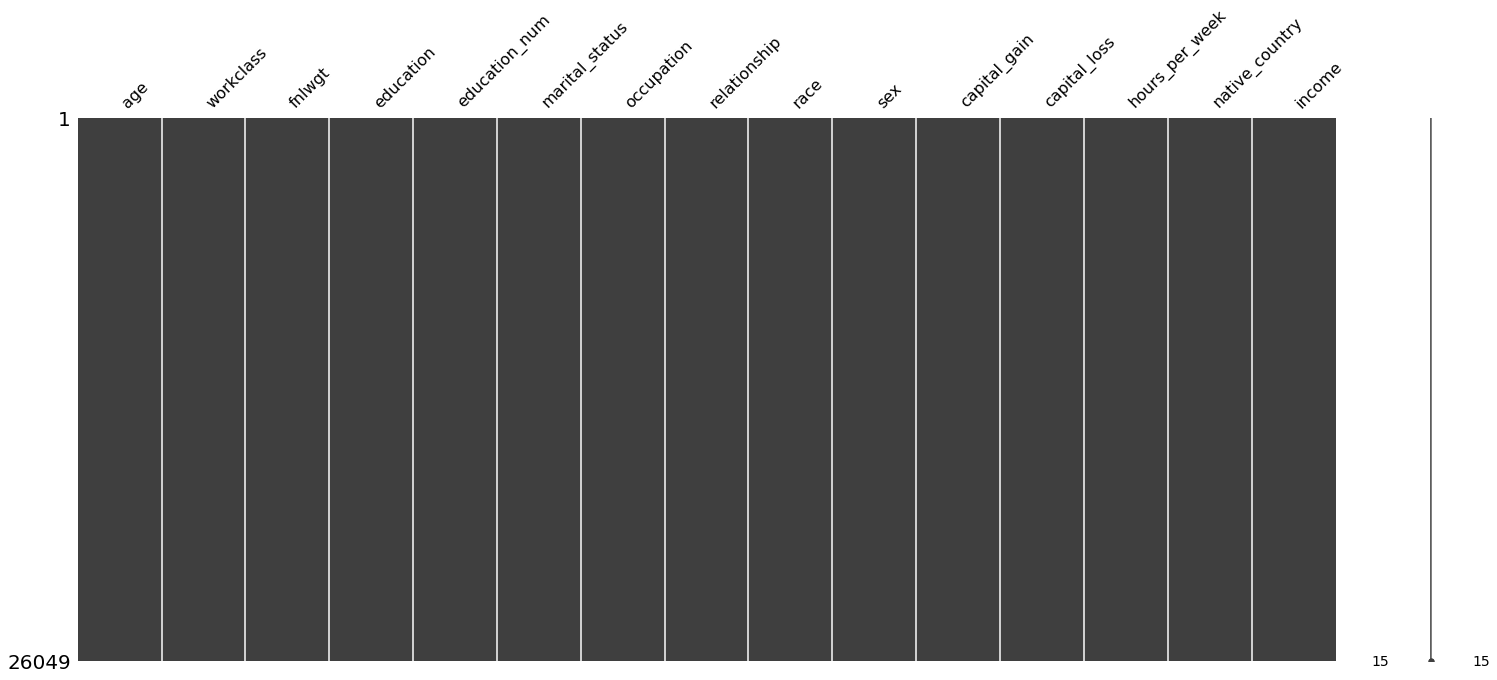

In [11]:
# 결측치 시각화
import missingno as msno

msno.matrix(train)

## Target 분포확인

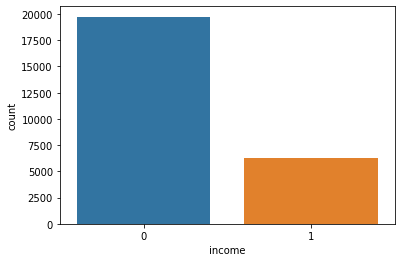

In [12]:
sns.countplot(data=train, x='income')

## Train과 Test의 차이 확인

### 수치형 변수

- age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

분포에 큰 차이를 보이는 변수는 없음


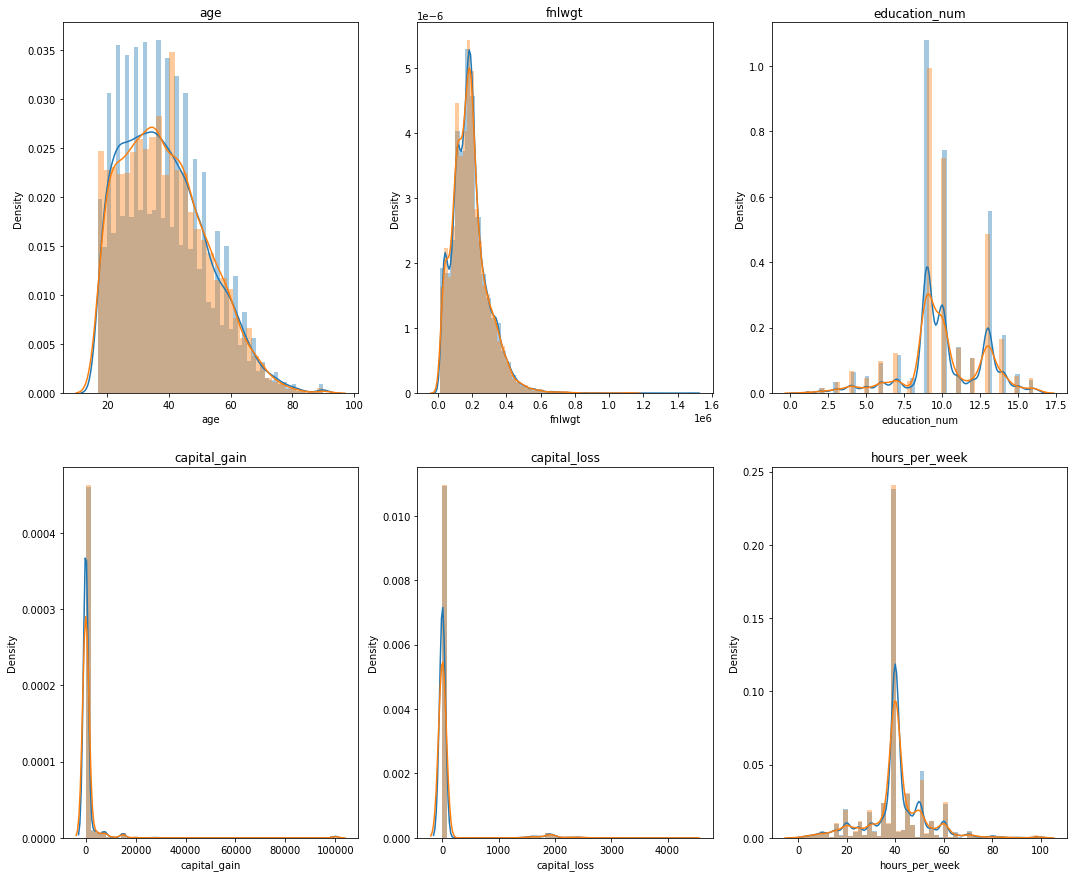

In [13]:
figure, ax = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,15)
sns.distplot(train['age'], ax=ax[0][0])
sns.distplot(test['age'], ax=ax[0][0])

sns.distplot(train['fnlwgt'], ax=ax[0][1])
sns.distplot(test['fnlwgt'], ax=ax[0][1])

sns.distplot(train['education_num'], ax=ax[0][2])
sns.distplot(test['education_num'], ax=ax[0][2])

sns.distplot(train['capital_gain'], ax=ax[1][0])
sns.distplot(test['capital_gain'], ax=ax[1][0])

sns.distplot(train['capital_loss'], ax=ax[1][1])
sns.distplot(test['capital_loss'], ax=ax[1][1])

sns.distplot(train['hours_per_week'], ax=ax[1][2])
sns.distplot(test['hours_per_week'], ax=ax[1][2])

ax[0][0].set(title="age")
ax[0][1].set(title="fnlwgt")
ax[0][2].set(title="education_num")
ax[1][0].set(title="capital_gain")
ax[1][1].set(title="capital_loss")
ax[1][2].set(title="hours_per_week");

### 범주형 변수

- workclass, education, marital_status, occupation, relationship, race, sex, native_country

native_country 제외하고는 모두 동일함

In [14]:
cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

def select(train, test, col):
  # Train/Test-set의 고유한 col를 구함.
  train_set = set(train[col])
  test_set  = set(test[col])

  print("Train-set에 있는 고유한 {}의 개수 : {}".format(col, len(train_set)))
  print("Test-set에 있는 고유한 {}의 개수 : {}".format(col, len(test_set)))

  print('='* 80)
  common = train_set.intersection(test_set)
  print("Train/Test-set에 공통으로 포함되어 있는 {} 개수 : {}".format(col, len(common)))

  print('='* 80)
  only_train = train_set.difference(test_set)
  print("Train-set에만 있는 {}는 총 {}개 입니다.".format(col, len(only_train)))
  print("Train-set에만 있는 {}는 : {}".format(col, sorted(only_train)))

  print('='* 80)
  only_test = test_set.difference(train_set)
  print("Test-set에만 있는 {}는 총 {}개 입니다.".format(col, len(only_test)))
  print("Test-set에만 있는 {}는 : {}".format(col, sorted(only_test)))
  print('='* 80)
  print('종료')
  print('='* 80)

In [15]:
for col in cols:
  select(train, test, col)

Train-set에 있는 고유한 workclass의 개수 : 9
Test-set에 있는 고유한 workclass의 개수 : 9
Train/Test-set에 공통으로 포함되어 있는 workclass 개수 : 9
Train-set에만 있는 workclass는 총 0개 입니다.
Train-set에만 있는 workclass는 : []
Test-set에만 있는 workclass는 총 0개 입니다.
Test-set에만 있는 workclass는 : []
종료
Train-set에 있는 고유한 education의 개수 : 16
Test-set에 있는 고유한 education의 개수 : 16
Train/Test-set에 공통으로 포함되어 있는 education 개수 : 16
Train-set에만 있는 education는 총 0개 입니다.
Train-set에만 있는 education는 : []
Test-set에만 있는 education는 총 0개 입니다.
Test-set에만 있는 education는 : []
종료
Train-set에 있는 고유한 marital_status의 개수 : 7
Test-set에 있는 고유한 marital_status의 개수 : 7
Train/Test-set에 공통으로 포함되어 있는 marital_status 개수 : 7
Train-set에만 있는 marital_status는 총 0개 입니다.
Train-set에만 있는 marital_status는 : []
Test-set에만 있는 marital_status는 총 0개 입니다.
Test-set에만 있는 marital_status는 : []
종료
Train-set에 있는 고유한 occupation의 개수 : 15
Test-set에 있는 고유한 occupation의 개수 : 15
Train/Test-set에 공통으로 포함되어 있는 occupation 개수 : 15
Train-set에만 있는 occupation는 총 0개 입니다.
Train-set에만 있는 occupation는 : []
Test-set에만 있는 

# BaseLine Model

In [16]:
# 모델을 만들기 전 데이터를 보존하기 위해서 저장
tmp_train = train.copy()
tmp_test = test.copy()
all_data = pd.concat([tmp_train, tmp_test])

## 범주형 변수 라벨 인코딩

In [17]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook
lbl = LabelEncoder()

In [18]:
cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for col in tqdm_notebook(cols):
  lbl.fit(all_data[col])
  tmp_train[col] = lbl.transform(tmp_train[col])
  tmp_test[col] = lbl.transform(tmp_test[col])

In [19]:
features = tmp_train.iloc[:, :-1]
label = tmp_train.iloc[:, -1]

In [20]:
tmp_test.shape[0]

6512

In [21]:
np.zeros((tmp_test.shape[0],))

array([0., 0., 0., ..., 0., 0., 0.])

## 모델 학습 및 평가

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [23]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [24]:
rf_oof_train = np.zeros_like(label)
lgr_oof_train = np.zeros_like(label)
lg_oof_train = np.zeros_like(label)
dt_oof_train = np.zeros_like(label)
xg_oof_train = np.zeros_like(label)

rf_oof_test = np.zeros((tmp_test.shape[0],))
lgr_oof_test = np.zeros((tmp_test.shape[0],))
lg_oof_test = np.zeros((tmp_test.shape[0],))
dt_oof_test = np.zeros((tmp_test.shape[0],))
xg_oof_test = np.zeros((tmp_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(features, label))) :
    trn_data, trn_label = features.iloc[trn_idx], label[trn_idx]
    val_data, val_label = features.iloc[val_idx], label[val_idx]

    # RandomForestClassifier
    rf = RandomForestClassifier(random_state=22)
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict(val_data)
    rf_oof_train[val_idx] = rf_valid_pred

    pred = rf.predict_proba(tmp_test)[:, 1]
    rf_oof_test += pred / n_split

    # LogisticRegression
    lgr = LogisticRegression(random_state=22)
    lgr.fit(trn_data, trn_label)
    lgr_valid_pred = lgr.predict(val_data)
    lgr_oof_train[val_idx] = lgr_valid_pred

    pred = rf.predict_proba(tmp_test)[:, 1]
    lgr_oof_test += pred / n_split

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict(val_data)
    lg_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(tmp_test)[:, 1]
    lg_oof_test += pred / n_split

    # DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=22)
    dt.fit(trn_data, trn_label)
    dt_valid_pred = dt.predict(val_data)
    dt_oof_train[val_idx] = dt_valid_pred

    pred = dt.predict_proba(tmp_test)[:, 1]
    dt_oof_test += pred / n_split

    # xgboost
    xg = xgb.XGBRFClassifier(random_state=22)
    xg.fit(trn_data, trn_label)
    xg_valid_pred = xg.predict(val_data)
    xg_oof_train[val_idx] = xg_valid_pred

    pred = xg.predict_proba(tmp_test)[:, 1] / n_split
    xg_oof_test += pred

## 모델 정확도 및 중요 변수 확인

In [25]:
from sklearn.metrics import accuracy_score, f1_score

print("lightgbm                      :{} ".format(f1_score(label, lg_oof_train, average='micro')))
print("RandomForestClassifier        :{} ".format(f1_score(label, rf_oof_train, average='micro')))
print("DecisionTreeClassifier        :{} ".format(f1_score(label, dt_oof_train, average='micro')))
print("xgboost                       :{} ".format(f1_score(label, xg_oof_train, average='micro')))
print("LogisticRegression            :{} ".format(f1_score(label, lgr_oof_train, average='micro')))

lightgbm                      :0.8707052094130293 
RandomForestClassifier        :0.8549272524857 
DecisionTreeClassifier        :0.8082843871165879 
xgboost                       :0.8378440631118277 
LogisticRegression            :0.7956543437368038 


[Text(0.5, 1.0, 'Coef of LogisticRegression')]

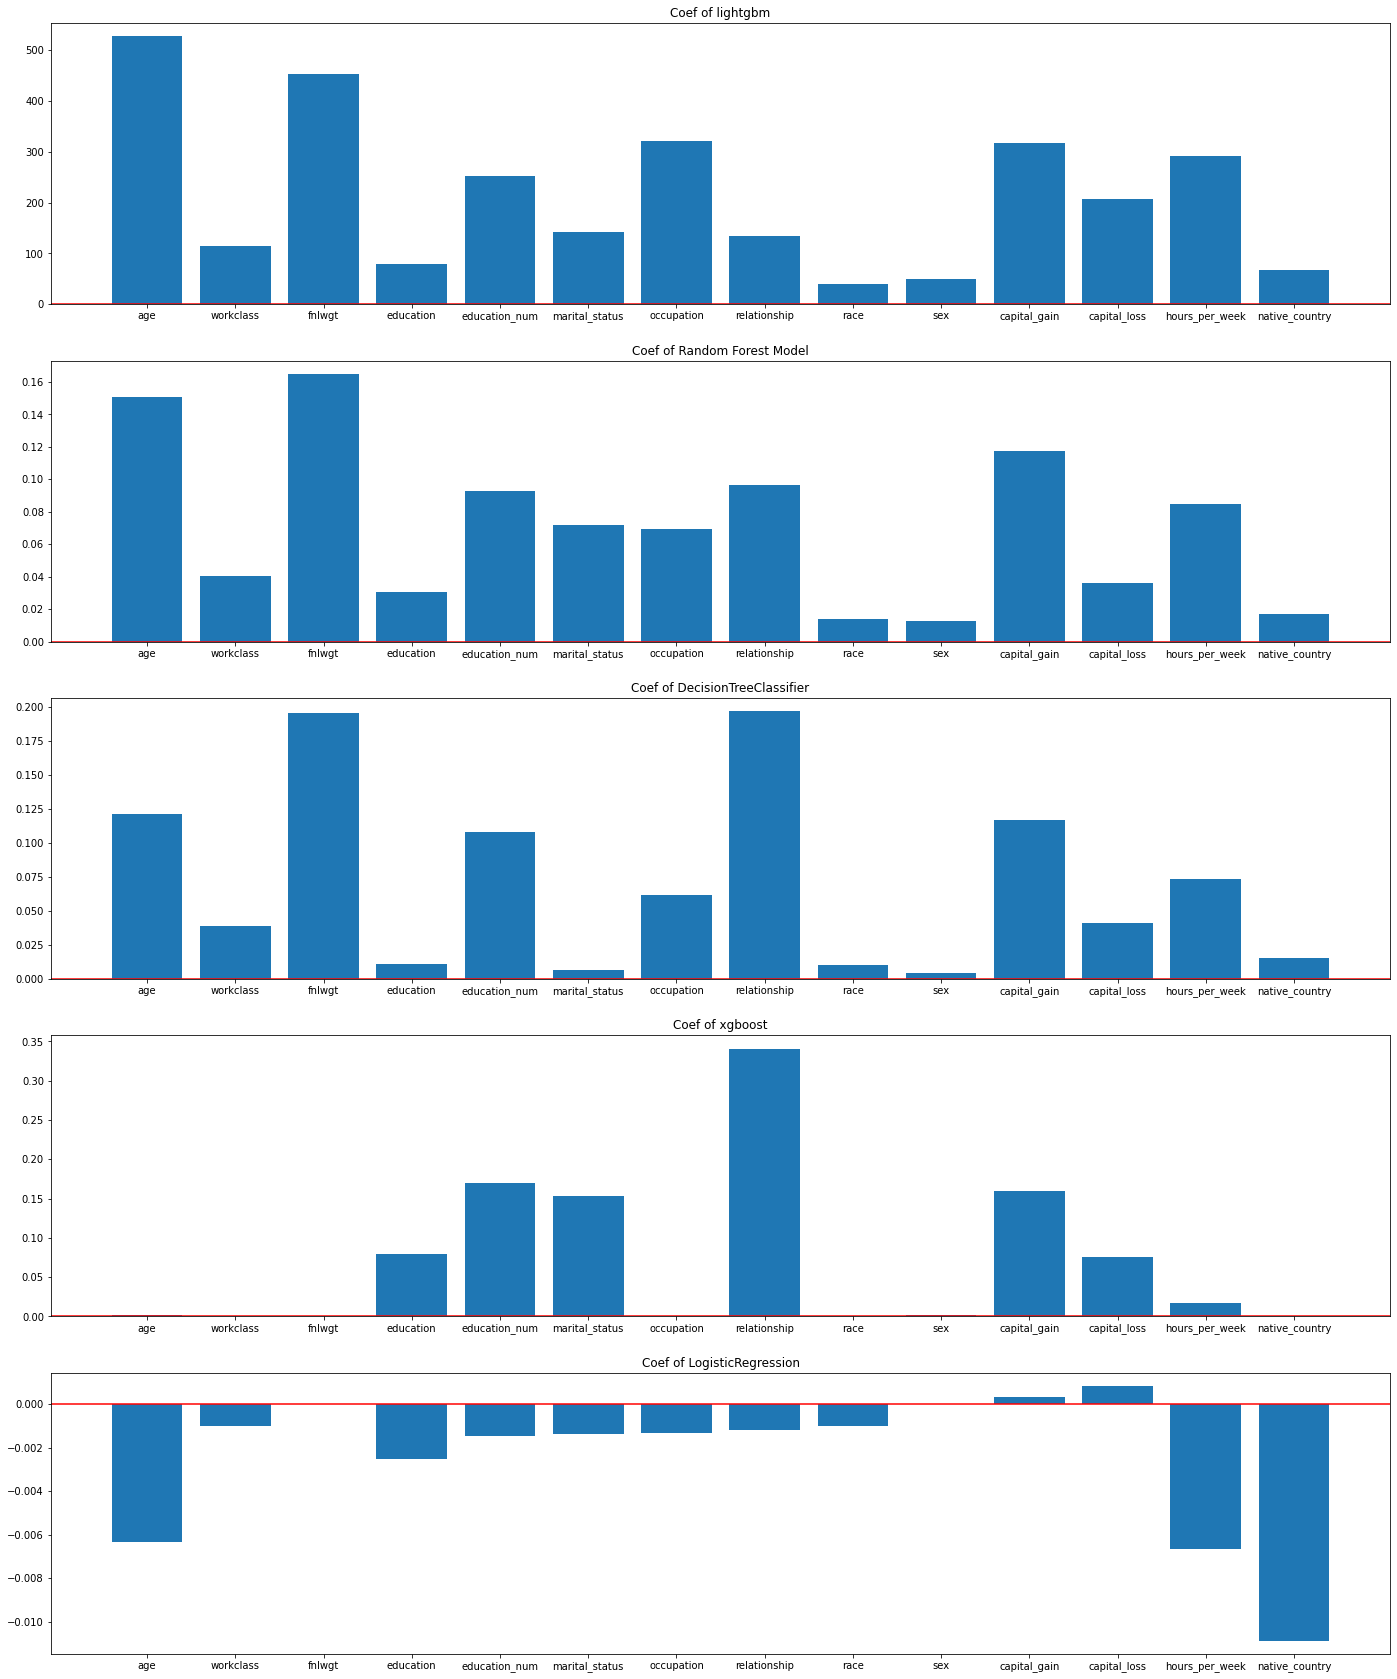

In [26]:
figure, ax = plt.subplots(nrows=5, ncols=1)
figure.set_size_inches(24,30)

# lightgbm
ax[0].bar( features.columns, lg.feature_importances_)
ax[0].axhline(y=0, color='r', linestyle='-')
ax[0].set(title="Coef of lightgbm")

# RandomForest
ax[1].bar( features.columns,  rf.feature_importances_ )
ax[1].axhline(y=0, color='r', linestyle='-')
ax[1].set(title="Coef of Random Forest Model")

# DecisionTreeClassifier
ax[2].bar( features.columns, dt.feature_importances_)
ax[2].axhline(y=0, color='r', linestyle='-')
ax[2].set(title="Coef of DecisionTreeClassifier")

# xgboost
ax[3].bar( features.columns, xg.feature_importances_)
ax[3].axhline(y=0, color='r', linestyle='-')
ax[3].set(title="Coef of xgboost")

# LogisticRegression
ax[4].bar( features.columns, lgr.coef_.reshape(-1,))
ax[4].axhline(y=0, color='r', linestyle='-')
ax[4].set(title="Coef of LogisticRegression")

## 베이스라인 모델 제출

성능이 가장 좋은 모델인 lightgbm의 경우

성능이 0.87579가 나옴

In [27]:
submission['prediction'] = (lg_oof_test > 0.5).astype(int)
submission.to_csv('baseLine_Model.csv', index=False)

성능이 두번째로 좋은 모델인 랜덤포레스트의 경우

성능이 0.86043가 나옴

In [28]:
# submission['prediction'] = (rf_oof_test > 0.5).astype(int)
# submission.to_csv('baseLine_Model_rf.csv', index=False)

이제 EDA를 통해서 중요한 픽쳐를 찾고 그를 기반으로 모델의 성능을 높이고자 함

베이스 라인의 모델의 성능이 향상되면 예측 정확도 충분히 향상될 것임

# EDA

In [29]:
cat_features = [ idx for idx, c in zip(train.dtypes.index, train.dtypes) if c != 'int64']
num_features = [ idx for idx, c in zip(train.dtypes.index, train.dtypes) if c == 'int64']

print(f'###############범주형 변수##############\n{cat_features}')
print()
print(f'###############수치형 변수##############\n{num_features}')

###############범주형 변수##############
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

###############수치형 변수##############
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']


In [30]:
# 수치형 변수 시각화를 위한 함수

def get_distribution(df, feature):
  print(f'{feature}의 분포도와 기초통계량')
  print(df[feature].describe())

def plot_hist(df, feature, bins=10, h=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    if h:
      sns.histplot(df, x=feature ,bins=bins, ax=ax, hue='income')
      ax.set_title(feature+' distribution (bins='+str(bins)+')')
    else:
      sns.histplot(df, x=feature ,bins=bins, ax=ax)
      ax.set_title(feature+' distribution (bins='+str(bins)+')')
    plt.show()

def plot_box(df, feature, h=True):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    if h:
      sns.boxplot(data = df, y = feature, x='income')
      ax.set_title(feature+' distribution ')
    else:
      sns.boxplot(data = df, y = feature)
      ax.set_title(feature+' distribution ')
    plt.show()

def plot_dis(df, feature, h=True):
    if h:
      sns.displot(data = df, x=feature, hue='income', kde=True)
    else:
      sns.displot(data = df, x=feature, kde=True)

In [31]:
# 범주형 변수 시각화를 위한 함수

def get_category(df, feature):
  lens = df[feature].nunique()
  values = df[feature].value_counts()
  print(f'{feature}의 개수는 {lens}\n')
  print(f'##########{feature}의 종류#########')
  print(values)

def get_count(df, feature, h=False):
  fig, ax = plt.subplots(1, 1, figsize=(20, 7))
  values = df[feature].value_counts().index
  if h:
    sns.countplot(data = df, x=feature, ax= ax, order = values, hue='income')
  else:
    sns.countplot(data = df, x=feature, ax= ax, order = values)
  ax.set_title(f'{feature} Count')
  plt.xticks(rotation=45)


def get_count_drop_col(df, feature, col, h=False):
  fig, ax = plt.subplots(1, 1, figsize=(20, 7))
  values = df[feature].value_counts().index
  if h:
    sns.countplot(data = df[df[feature] != col], x=feature, ax= ax, order = values, hue='income')
  else:
    sns.countplot(data = df[df[feature] != col], x=feature, ax= ax, order = values)
  ax.set_title(f'{feature} Count')
  plt.xticks(rotation=45)

## age : 나이

- 나이가 많을 수록 소득이 높은 경향이 존재함 

- 전체적인 분포가 왼쪽으로 치우쳐져 있으므로 로그변환을 해주면 좋을 듯

In [32]:
get_distribution(train, 'age')

age의 분포도와 기초통계량
count    26049.000000
mean        38.569235
std         13.671489
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


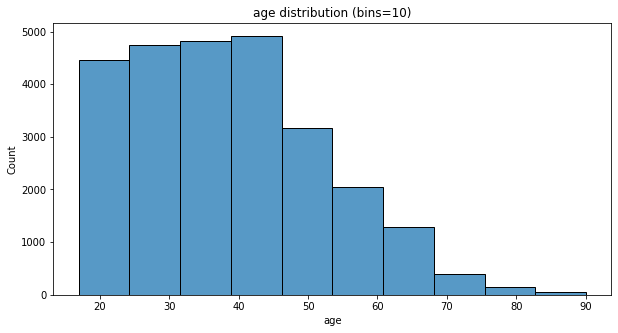

In [33]:
plot_hist(train, 'age', h=False)

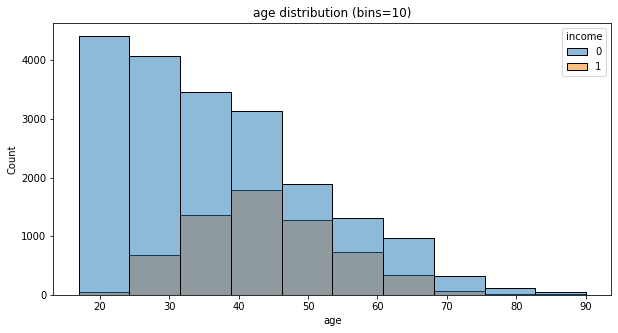

In [34]:
plot_hist(train, 'age')

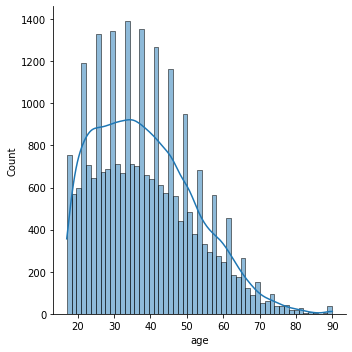

In [35]:
plot_dis(train, 'age', h=False)

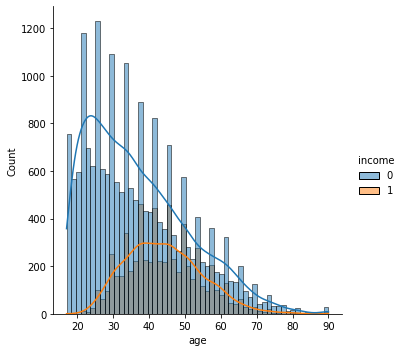

In [36]:
plot_dis(train, 'age', h=True)

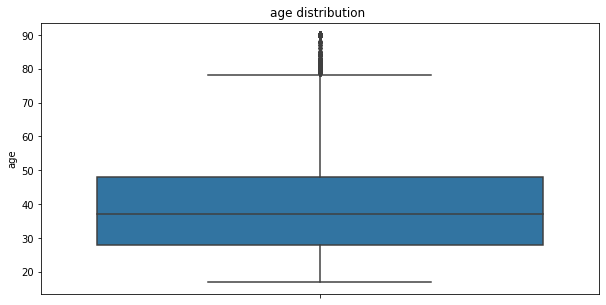

In [37]:
plot_box(train, 'age', h=False)

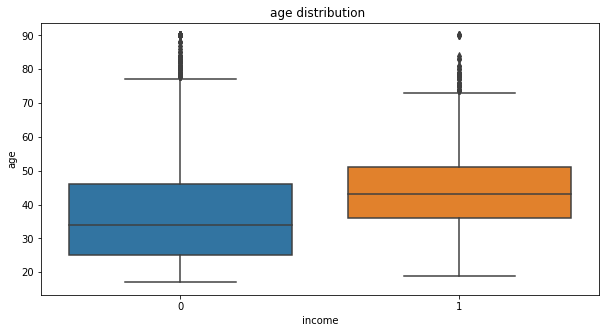

In [38]:
plot_box(train, 'age')

## workclass : 고용 형태

고용 형태는 hours_per_week, income에 상당히 큰 관련성이 존재함

고소득층, 중산층, 수입이 완전히 없는 고용 형태로 나눌 수 있을 듯

1. income == 0

2. income >= 0.4

3. income >= 0.3

4. income >= 0.2

5. income >= 0.1


In [39]:
# 평균 소득이 낮은 업종 높은 업종으로 나눔
train.groupby('workclass').mean().sort_values(by='income' , ascending=False)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
workclass,,,,,,,
Self-emp-inc,46.123147,174538.315849,11.158495,4907.743444,154.050171,48.866591,0.565564
Federal-gov,42.645752,183719.874510,11.009150,805.257516,109.596078,41.154248,0.381699
Local-gov,41.797872,188577.967494,11.030142,985.520686,107.162530,41.109338,0.298463
Self-emp-not-inc,44.935468,175176.750246,10.227586,1829.109360,114.227094,44.409852,0.284236
State-gov,39.306807,187929.465005,11.364334,737.906999,69.847555,38.975072,0.277085
Private,36.756387,193592.115158,9.887932,901.189759,81.952381,40.287039,0.220328
?,41.219707,187093.543276,9.293609,615.042610,63.337550,32.068575,0.101864
Never-worked,19.000000,234209.000000,7.166667,0.000000,0.000000,26.500000,0.000000
Without-pay,46.909091,185711.090909,9.545455,620.909091,0.000000,32.363636,0.000000


In [40]:
train.groupby('workclass').agg(['mean', 'count'])

age                fnlwgt  ... hours_per_week    income       
                       mean  count           mean  ...          count      mean  count
workclass                                          ...                                
?                 41.219707   1502  187093.543276  ...           1502  0.101864   1502
Federal-gov       42.645752    765  183719.874510  ...            765  0.381699    765
Local-gov         41.797872   1692  188577.967494  ...           1692  0.298463   1692
Never-worked      19.000000      6  234209.000000  ...              6  0.000000      6
Private           36.756387  18123  193592.115158  ...          18123  0.220328  18123
Self-emp-inc      46.123147    877  174538.315849  ...            877  0.565564    877
Self-emp-not-inc  44.935468   2030  175176.750246  ...           2030  0.284236   2030
State-gov         39.306807   1043  187929.465005  ...           1043  0.277085   1043
Without-pay       46.909091     11  185711.090909  ...             11  0.000000     11

[9 rows x 14 columns]

In [41]:
get_category(train, 'workclass')

workclass의 개수는 9

##########workclass의 종류#########
Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64


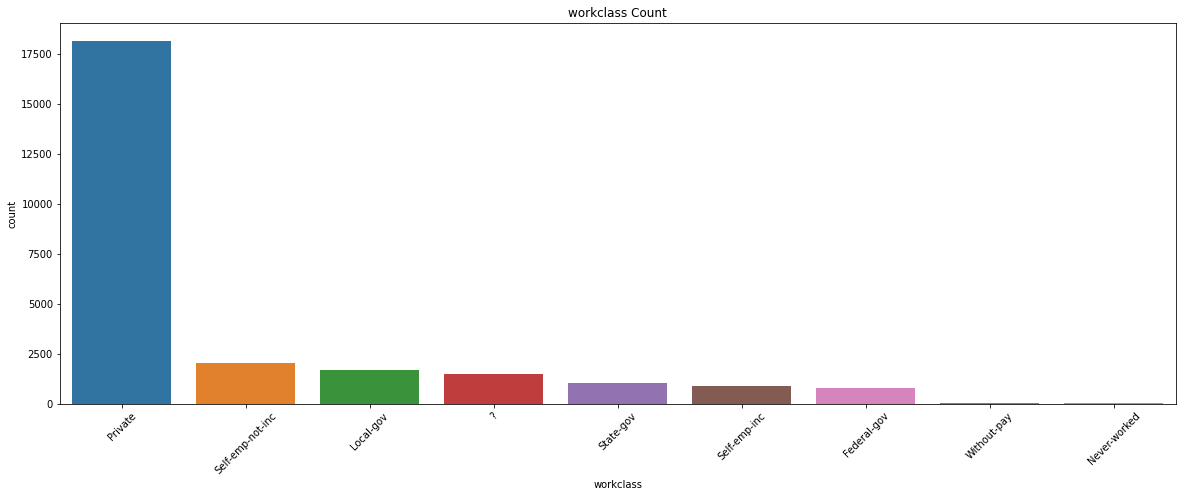

In [42]:
get_count(train, 'workclass')

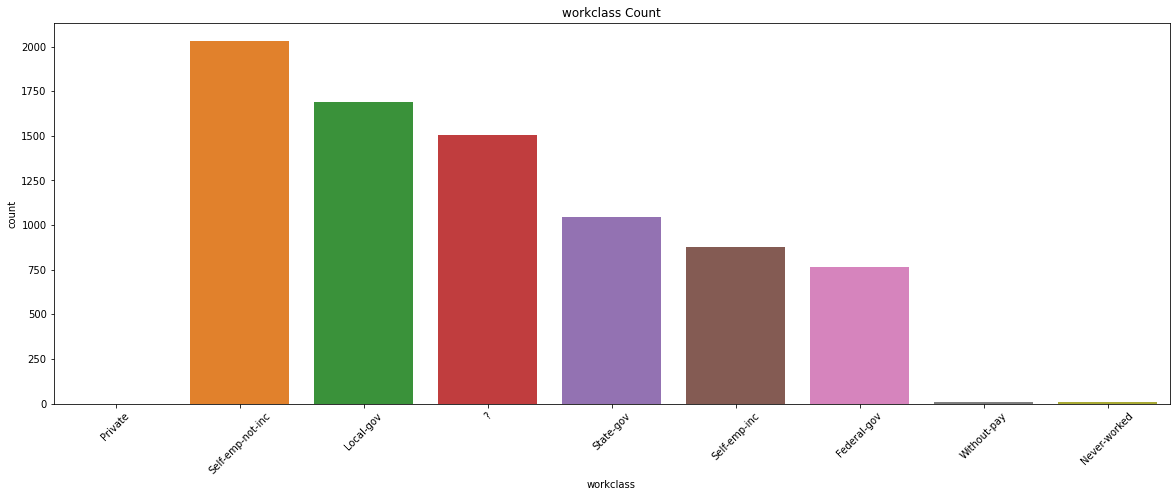

In [43]:
get_count_drop_col(train, 'workclass', 'Private')

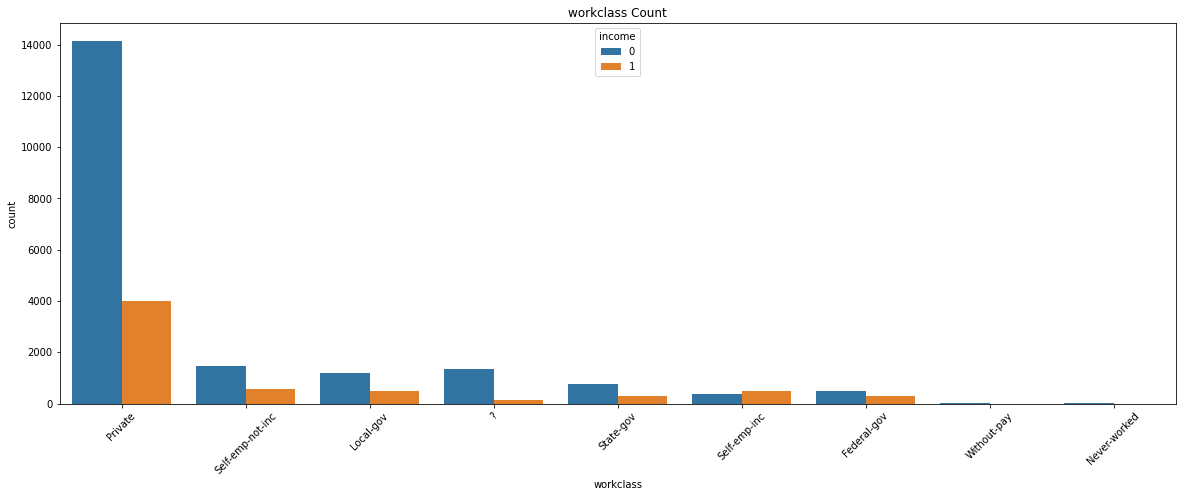

In [44]:
get_count(train, 'workclass', h=True)

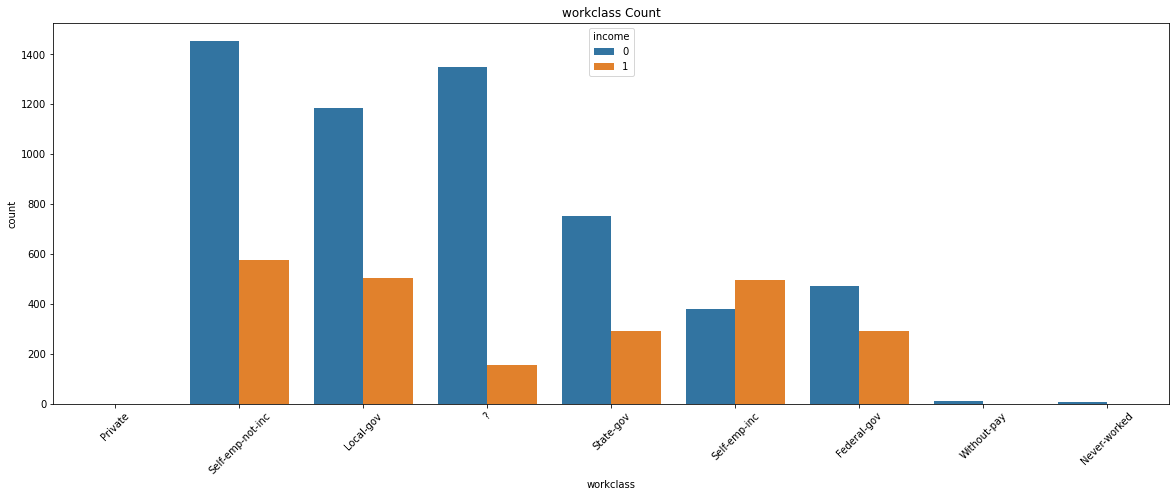

In [45]:
get_count_drop_col(train, 'workclass', 'Private', h=True)

In [46]:
# 평균 소득이 낮은 업종 높은 업종으로 나눔
train.groupby('workclass').mean()['income'].sort_values(ascending=False)

workclass
Self-emp-inc        0.565564
Federal-gov         0.381699
Local-gov           0.298463
Self-emp-not-inc    0.284236
State-gov           0.277085
Private             0.220328
?                   0.101864
Without-pay         0.000000
Never-worked        0.000000
Name: income, dtype: float64

## fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)

- 음 딱히 도움이 되는 칼럼 같아 보이지는 않음
- 전체적인 분포가 한쪽으로 치우쳐져 있기 때문에 로그변환 정도가 최선일 듯

In [47]:
train.groupby('workclass').mean()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
workclass,,,,,,,
?,41.219707,187093.543276,9.293609,615.042610,63.337550,32.068575,0.101864
Federal-gov,42.645752,183719.874510,11.009150,805.257516,109.596078,41.154248,0.381699
Local-gov,41.797872,188577.967494,11.030142,985.520686,107.162530,41.109338,0.298463
Never-worked,19.000000,234209.000000,7.166667,0.000000,0.000000,26.500000,0.000000
Private,36.756387,193592.115158,9.887932,901.189759,81.952381,40.287039,0.220328
Self-emp-inc,46.123147,174538.315849,11.158495,4907.743444,154.050171,48.866591,0.565564
Self-emp-not-inc,44.935468,175176.750246,10.227586,1829.109360,114.227094,44.409852,0.284236
State-gov,39.306807,187929.465005,11.364334,737.906999,69.847555,38.975072,0.277085
Without-pay,46.909091,185711.090909,9.545455,620.909091,0.000000,32.363636,0.000000


In [48]:
get_distribution(train, 'fnlwgt')

fnlwgt의 분포도와 기초통계량
count    2.604900e+04
mean     1.903045e+05
std      1.059663e+05
min      1.376900e+04
25%      1.181080e+05
50%      1.788660e+05
75%      2.377350e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


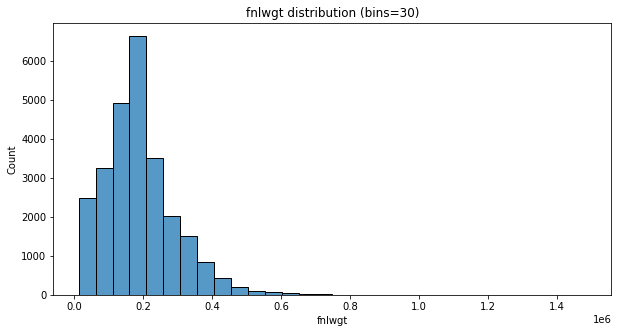

In [49]:
plot_hist(train, 'fnlwgt', bins=30, h=False)

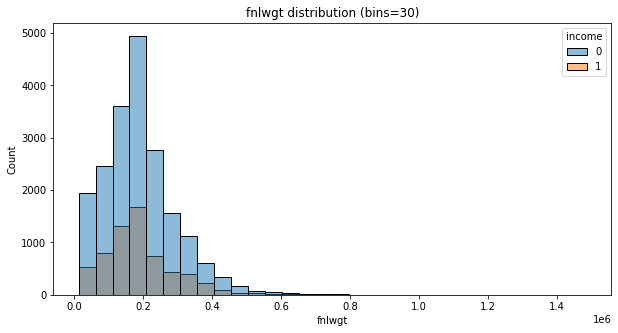

In [50]:
plot_hist(train, 'fnlwgt', bins=30)

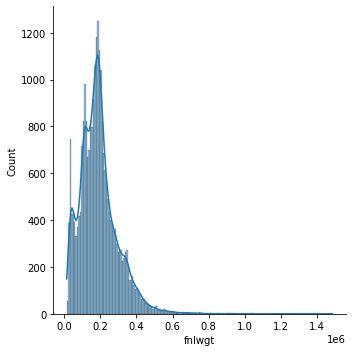

In [51]:
plot_dis(train, 'fnlwgt', h=False)

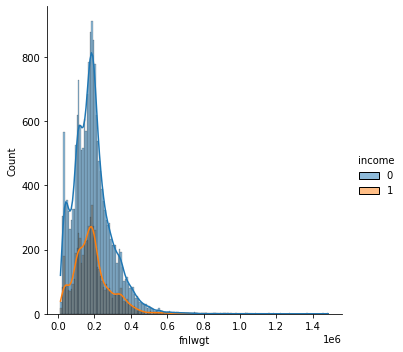

In [52]:
plot_dis(train, 'fnlwgt', h=True)

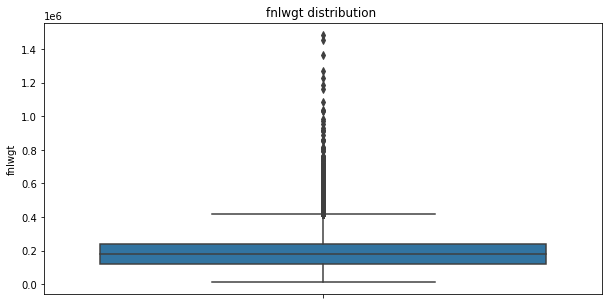

In [53]:
plot_box(train, 'fnlwgt', h=False)

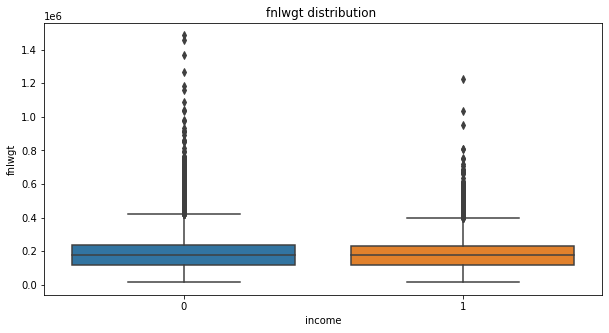

In [54]:
plot_box(train, 'fnlwgt')

## education : 교육 수준 / education_num : 교육 수준 수치

education과 education_num은 동일한 컬럼임 단순히 교육 수준을 순서화 시킨 것임

- 확실히 고스득자일 수록 학력이 높은 경향을 보임

1. education_num >= 15 'level_6'
2. education_num >= 13 'level_5'
3. education_num >= 11 'level_4'
4. education_num >= 9 'level_3'
5. education_num >= 2 'level_2'
6. education_num == 1 'level_1'

In [55]:
train.groupby('education').mean()[['income']].sort_values(by='income', ascending=False)

,income
education,
Doctorate,0.734177
Prof-school,0.733906
Masters,0.561684
Bachelors,0.415516
Assoc-voc,0.255474
Assoc-acdm,0.255344
Some-college,0.192586
HS-grad,0.158544
10th,0.072503


In [56]:
train.groupby('education').mean()[['education_num']].sort_values(by='education_num')

,education_num
education,
Preschool,1.0
1st-4th,2.0
5th-6th,3.0
7th-8th,4.0
9th,5.0
10th,6.0
11th,7.0
12th,8.0
HS-grad,9.0


In [57]:
get_category(train, 'education_num')

education_num의 개수는 16

##########education_num의 종류#########
9     8433
10    5800
13    4344
14    1378
11    1096
7      922
12     842
6      731
4      505
15     466
5      418
8      359
16     316
3      265
2      134
1       40
Name: education_num, dtype: int64


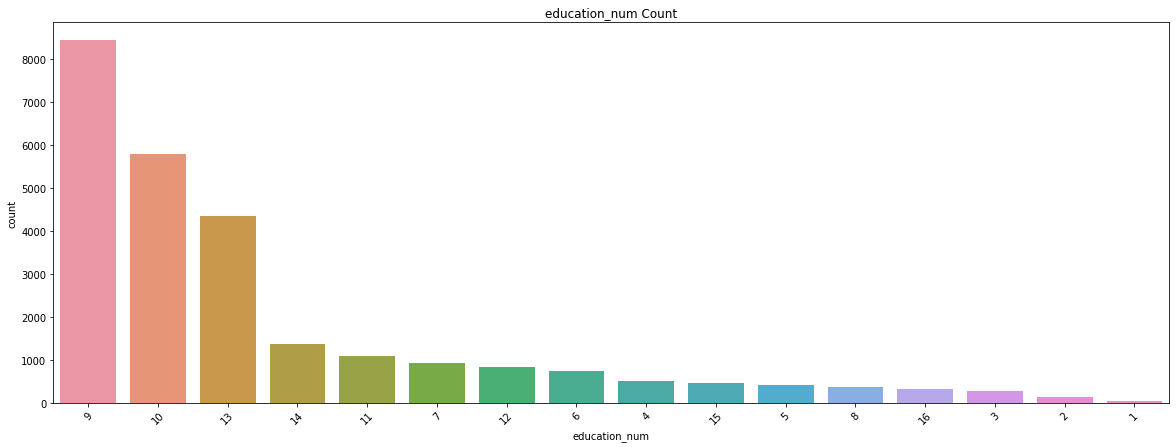

In [58]:
get_count(train, 'education_num')

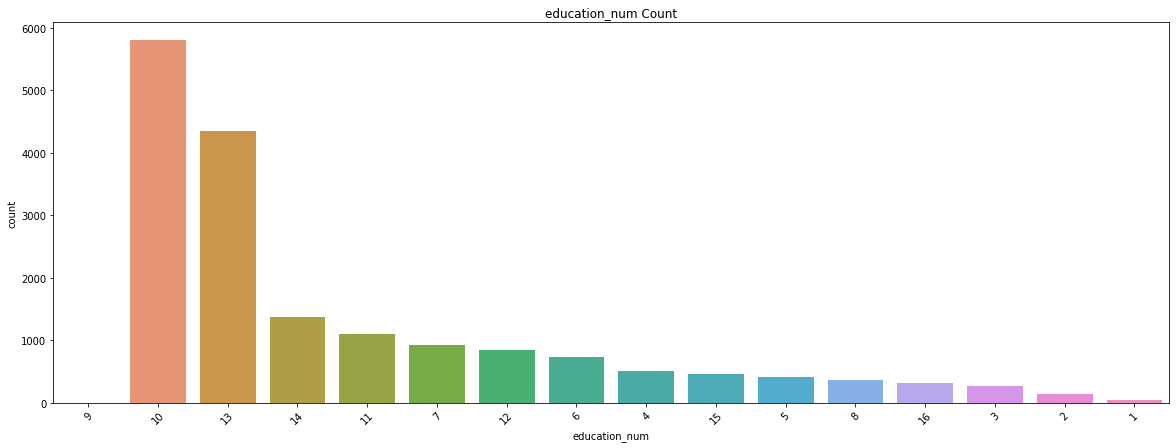

In [59]:
get_count_drop_col(train, 'education_num', 9)

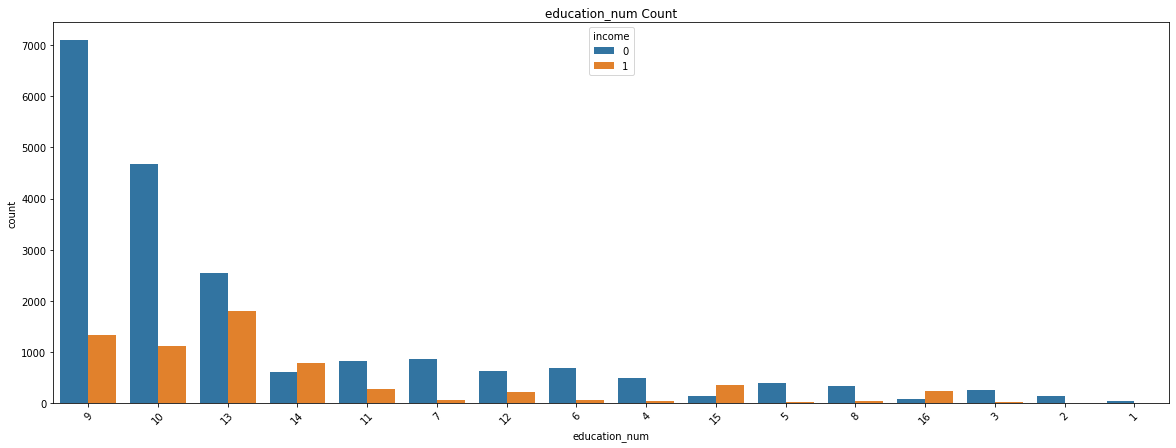

In [60]:
get_count(train, 'education_num', h=True)

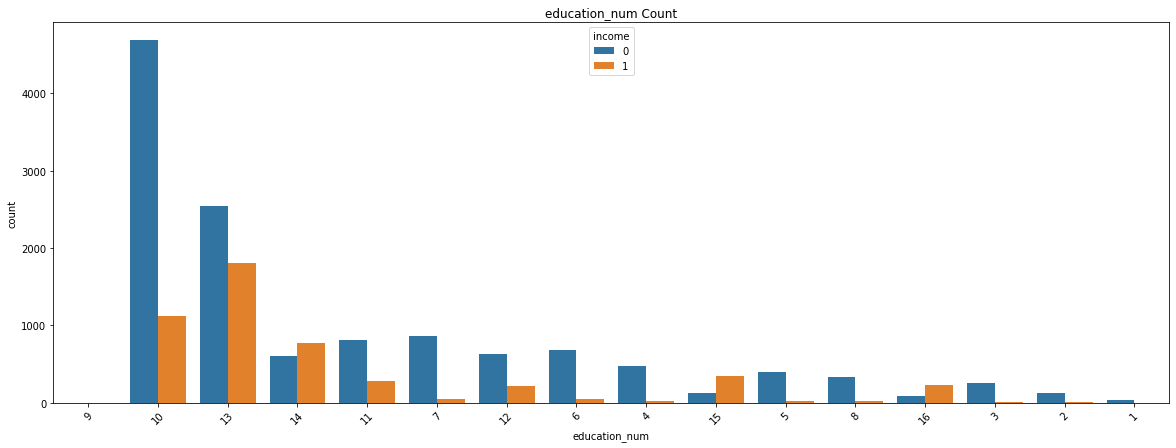

In [61]:
get_count_drop_col(train, 'education_num', 9, h=True)

In [62]:
get_distribution(train, 'education_num')

education_num의 분포도와 기초통계량
count    26049.000000
mean        10.088372
std          2.567610
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education_num, dtype: float64


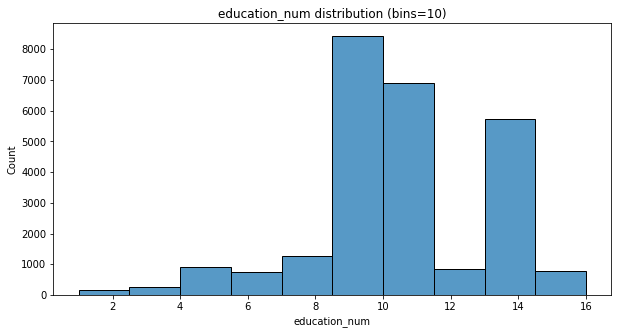

In [63]:
plot_hist(train, 'education_num', bins=10, h=False)

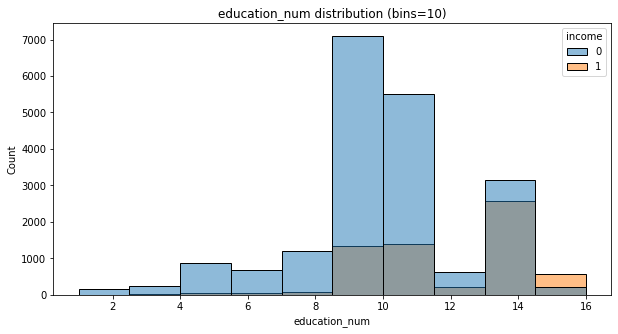

In [64]:
plot_hist(train, 'education_num', bins=10)

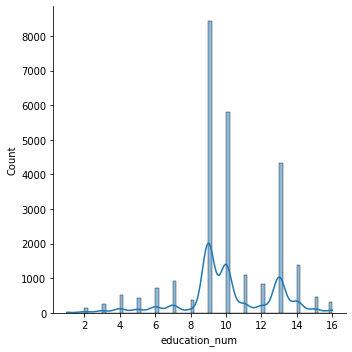

In [65]:
plot_dis(train, 'education_num', h=False)

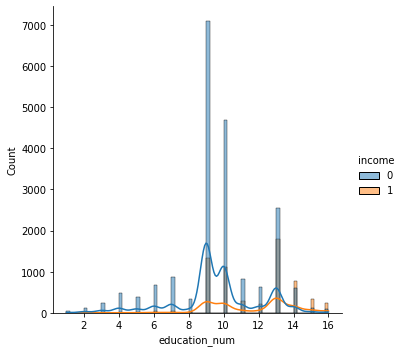

In [66]:
plot_dis(train, 'education_num', h=True)

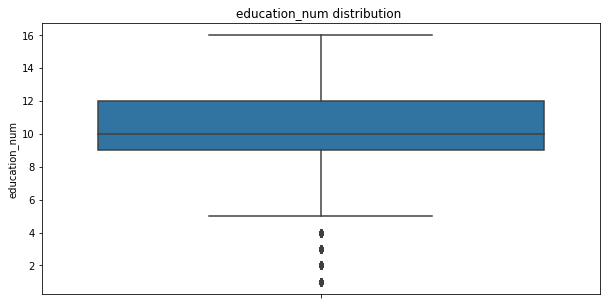

In [67]:
plot_box(train, 'education_num', h=False)

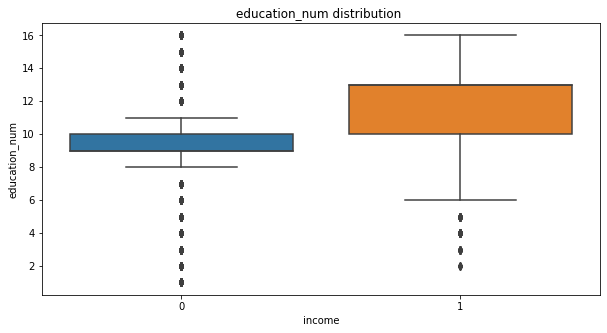

In [68]:
plot_box(train, 'education_num')

In [69]:
get_category(train, 'education')

education의 개수는 16

##########education의 종류#########
HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64


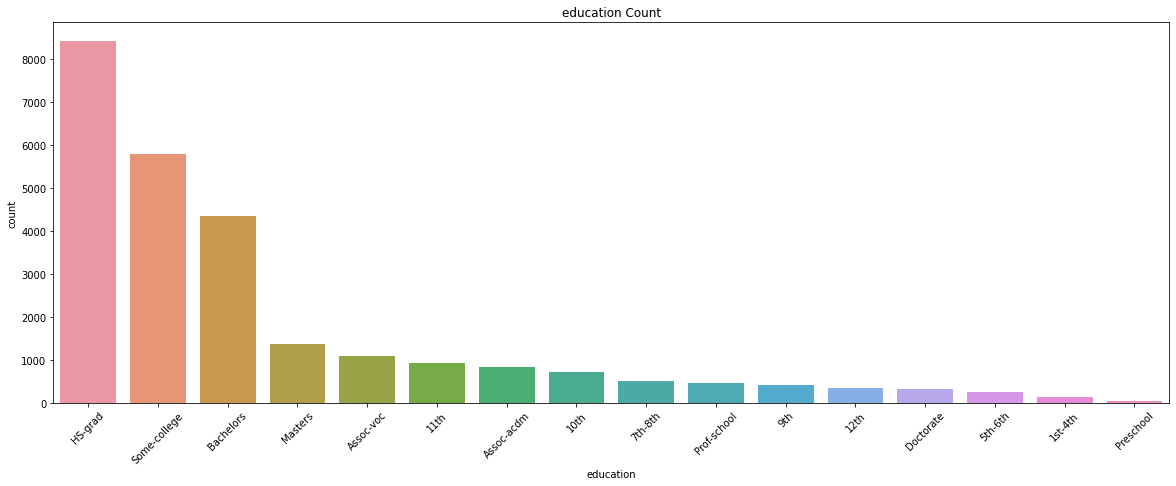

In [70]:
get_count(train, 'education')

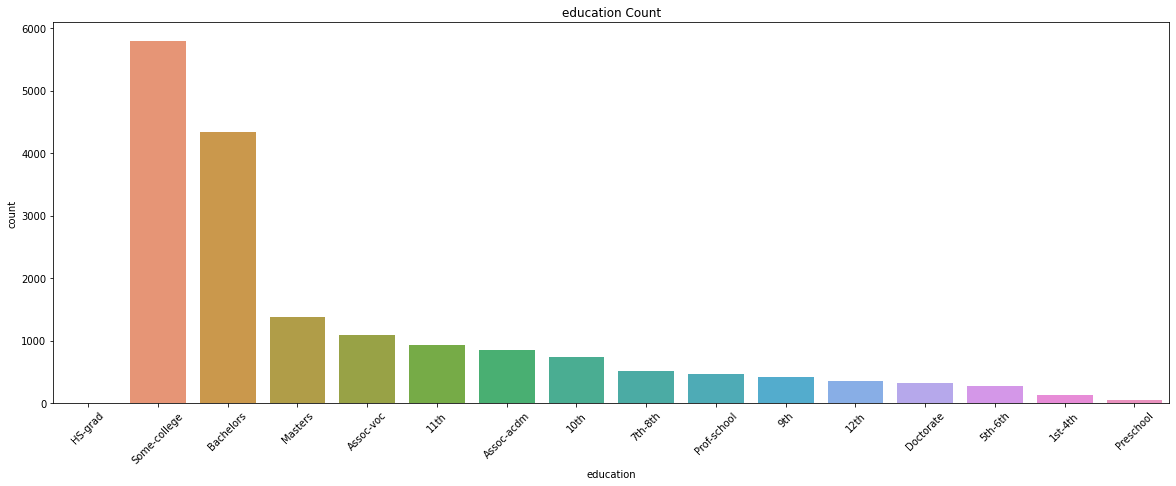

In [71]:
get_count_drop_col(train, 'education', 'HS-grad')

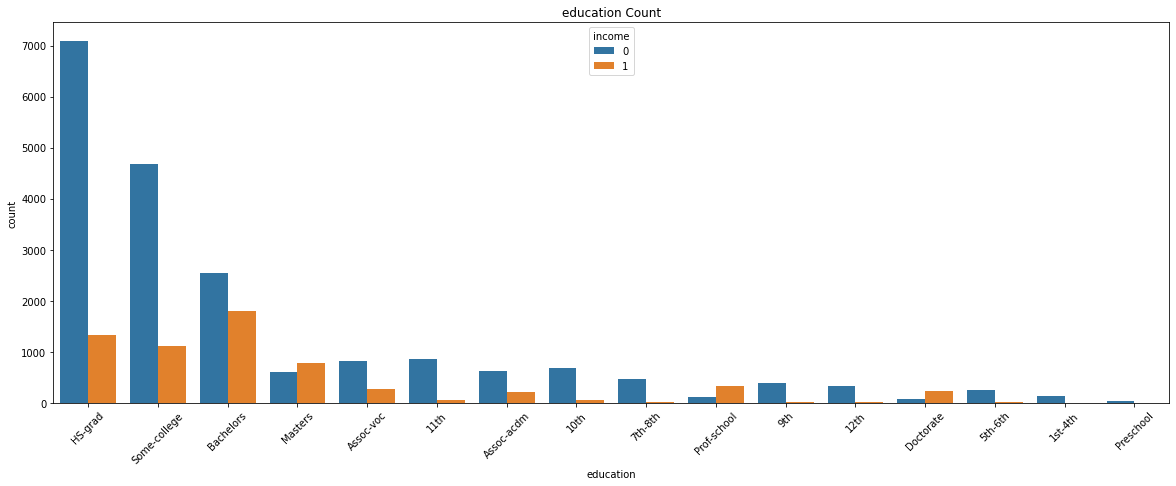

In [72]:
get_count(train, 'education', h=True)

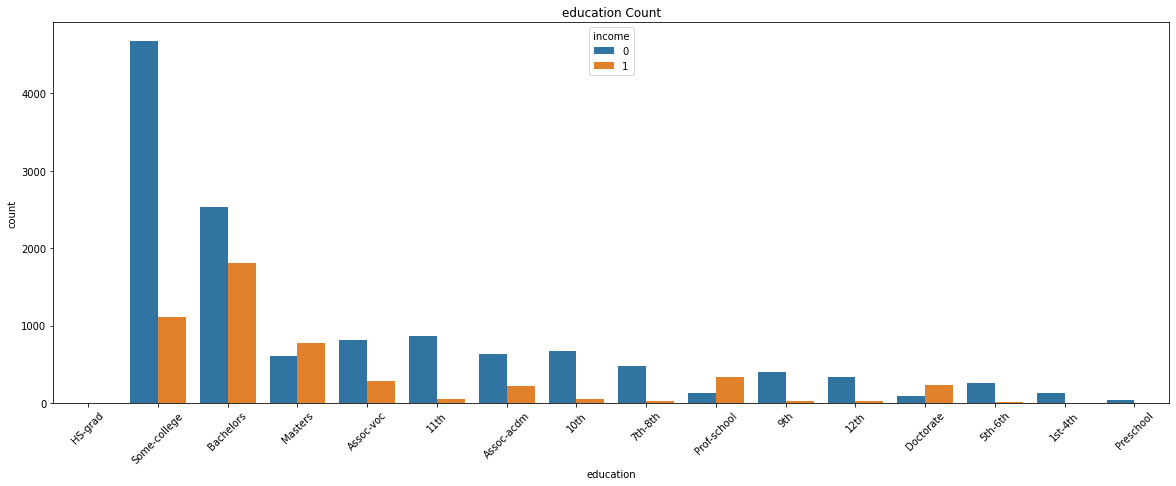

In [73]:
get_count_drop_col(train, 'education', 'HS-grad', h=True)

## marital_status: 결혼 상태

- Divorced  : 이혼
- Married-AF-spouse : 기혼 - 배우자가 군복무중으로  떨어져 생활하고 있는 경우
- Married-civ-spouse : 기혼 - 배우자가 민간인인 경우
- Married-spouse-absent : 기혼 - 배우자가 직업상의 이유로 떨어져 사는 경우
- Never-married : 미혼
- Separated : 별거
- Widowed : 사별

확실히 결혼을 했으며 같이 살 가능성이 높을 수록 소득이 높은 경향을 보임

Married-AF-spouse + Married-civ-spouse VS 그 외

In [74]:
train.groupby('marital_status').mean()[['income']].sort_values(by='income', ascending=False)

,income
marital_status,
Married-AF-spouse,0.526316
Married-civ-spouse,0.448789
Divorced,0.104921
Widowed,0.087940
Married-spouse-absent,0.080838
Separated,0.065375
Never-married,0.046802


In [75]:
get_category(train, 'marital_status')

marital_status의 개수는 7

##########marital_status의 종류#########
Married-civ-spouse       11970
Never-married             8568
Divorced                  3536
Separated                  826
Widowed                    796
Married-spouse-absent      334
Married-AF-spouse           19
Name: marital_status, dtype: int64


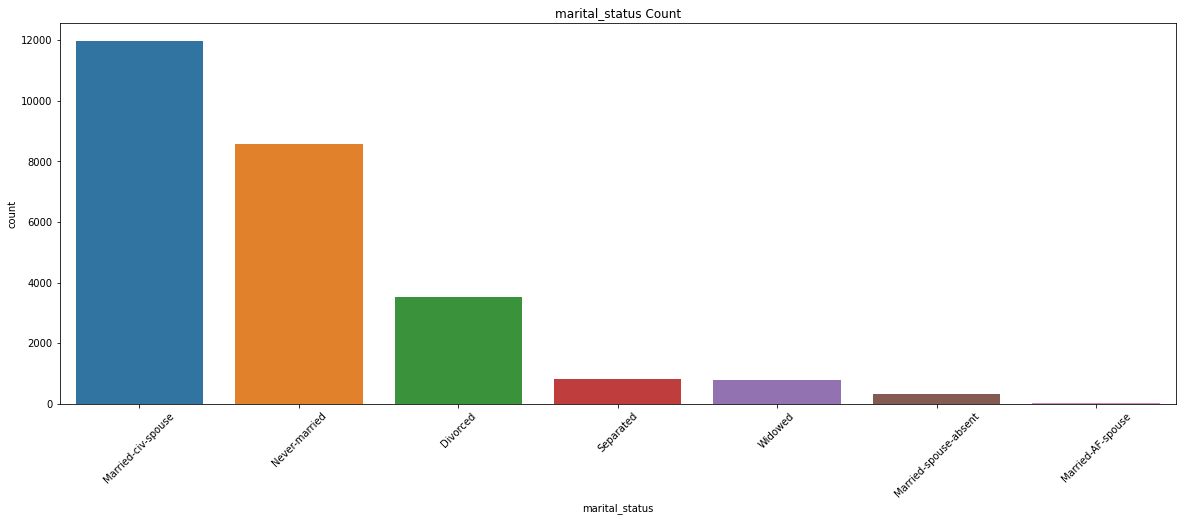

In [76]:
get_count(train, 'marital_status')

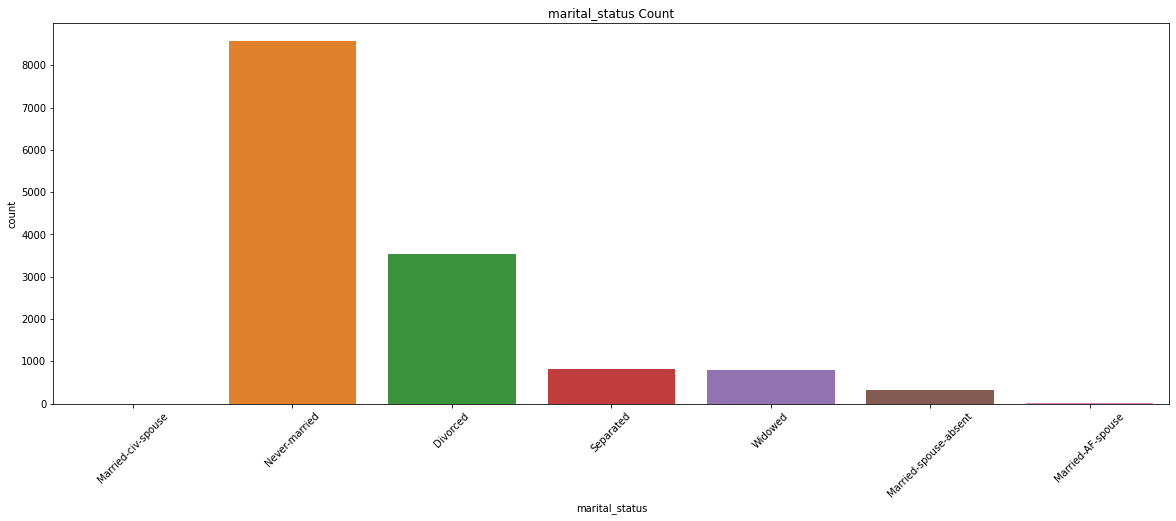

In [77]:
get_count_drop_col(train, 'marital_status', 'Married-civ-spouse')

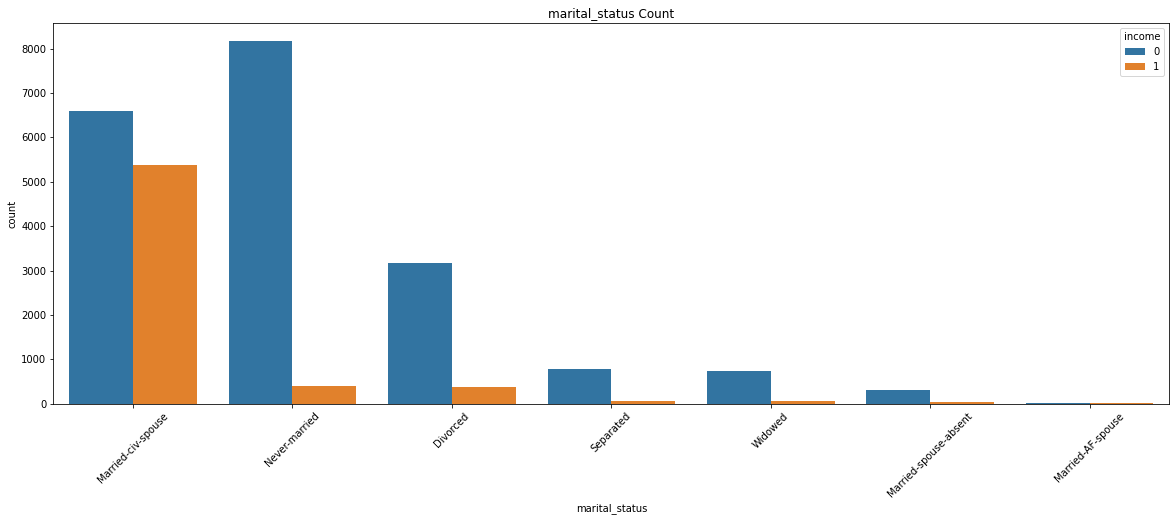

In [78]:
get_count(train, 'marital_status', h=True)

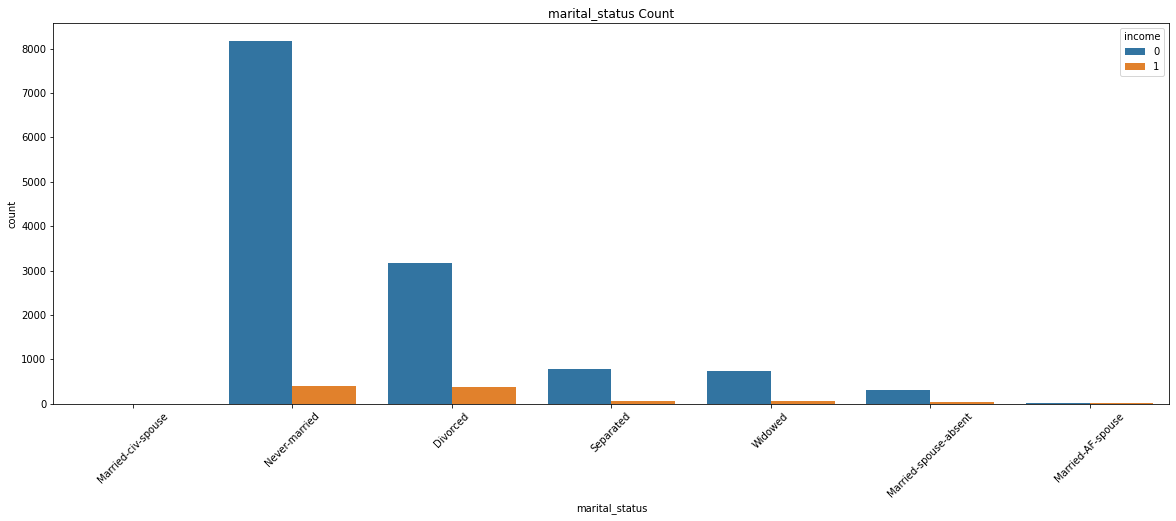

In [79]:
get_count_drop_col(train, 'marital_status', 'Married-civ-spouse', h=True)

## occupation : 업종

확실히 어떤 업종에 종사하느냐가 income에 큰 영향을 줌

1. income >= 0.4 high_occupation
2. income >= 0.3 high_mid_occupation
3. income >= 0.2 mid_occupation
4. income >= 0.1 mid_low_occupation
5. income <  0.1 low_occupation
6. income ==  0 other_occupation

In [80]:
train.groupby('occupation').mean().sort_values(by='income', ascending=False)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
occupation,,,,,,,
Exec-managerial,42.153112,185543.605052,11.449784,2291.161429,139.618916,45.014787,0.490758
Prof-specialty,40.399213,185400.002724,12.897397,2711.503935,132.375908,42.379843,0.451271
Protective-serv,39.180077,201516.327586,10.132184,688.739464,79.247126,42.712644,0.319923
Tech-support,36.733154,193585.012129,10.983827,582.823450,99.272237,39.010782,0.301887
Sales,37.362575,191183.797532,10.308539,1310.641428,99.989993,40.733155,0.270514
Craft-repair,38.867259,191969.405579,9.128755,693.445739,88.840589,42.222869,0.226242
Transport-moving,40.335433,191365.017323,8.763780,501.039370,76.019685,44.550394,0.199213
Adm-clerical,37.143815,193223.971840,10.131411,539.909487,61.305732,37.617499,0.134764
Machine-op-inspct,37.518331,195596.596713,8.554362,286.395702,67.893173,40.881795,0.126422


In [81]:
get_category(train, 'occupation')

occupation의 개수는 15

##########occupation의 종류#########
Prof-specialty       3304
Craft-repair         3262
Exec-managerial      3246
Sales                2998
Adm-clerical         2983
Other-service        2626
Machine-op-inspct    1582
?                    1508
Transport-moving     1270
Handlers-cleaners    1092
Farming-fishing       784
Tech-support          742
Protective-serv       522
Priv-house-serv       123
Armed-Forces            7
Name: occupation, dtype: int64


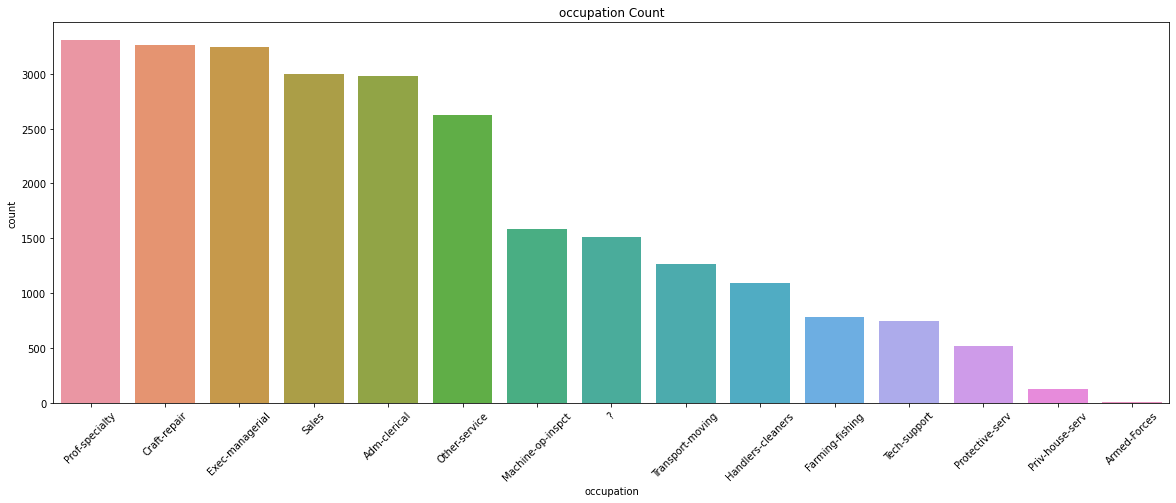

In [82]:
get_count(train, 'occupation')

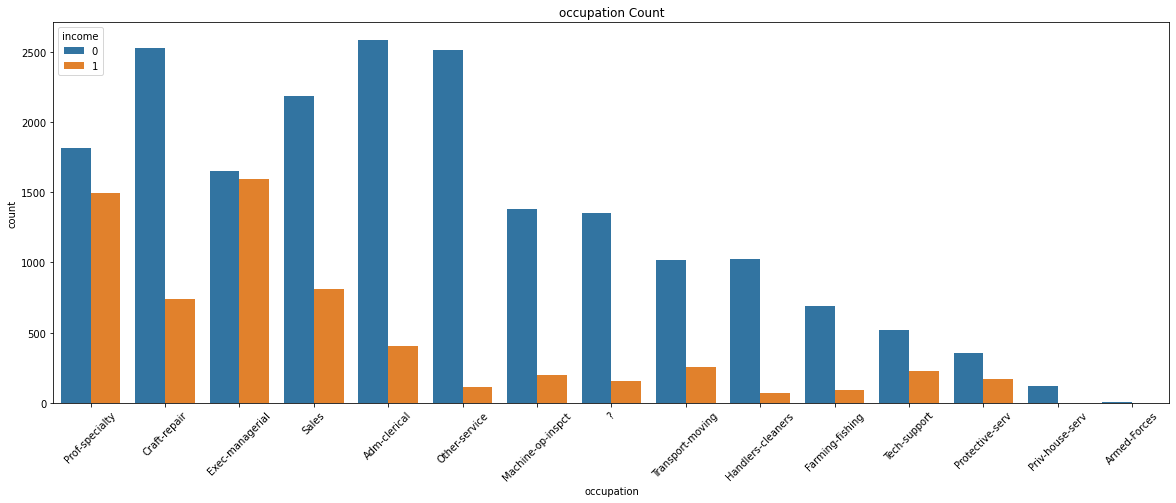

In [83]:
get_count(train, 'occupation', h=True)

## relationship : 가족 관계

어머니, 아버지의 경우 소득이 높은 경향이 있음

Wife + Husband VS 그외

In [84]:
train.groupby('relationship').mean().sort_values(by='income', ascending=False)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
relationship,,,,,,,
Wife,39.770635,182803.114286,10.460317,1559.313492,111.939683,36.842857,0.483333
Husband,43.827151,186778.367138,10.352623,1840.361541,126.863865,44.186605,0.449673
Not-in-family,38.393396,192433.693004,10.309560,723.169029,74.613239,40.615350,0.104795
Unmarried,40.269708,193115.325912,9.646715,501.348540,40.086131,39.065693,0.064234
Other-relative,33.312741,203988.379665,8.777349,314.289575,55.514801,37.045045,0.042471
Own-child,24.822884,193760.316175,9.480361,135.469139,38.845572,33.209319,0.012686


In [85]:
get_category(train, 'relationship')

relationship의 개수는 6

##########relationship의 종류#########
Husband           10541
Not-in-family      6632
Own-child          4099
Unmarried          2740
Wife               1260
Other-relative      777
Name: relationship, dtype: int64


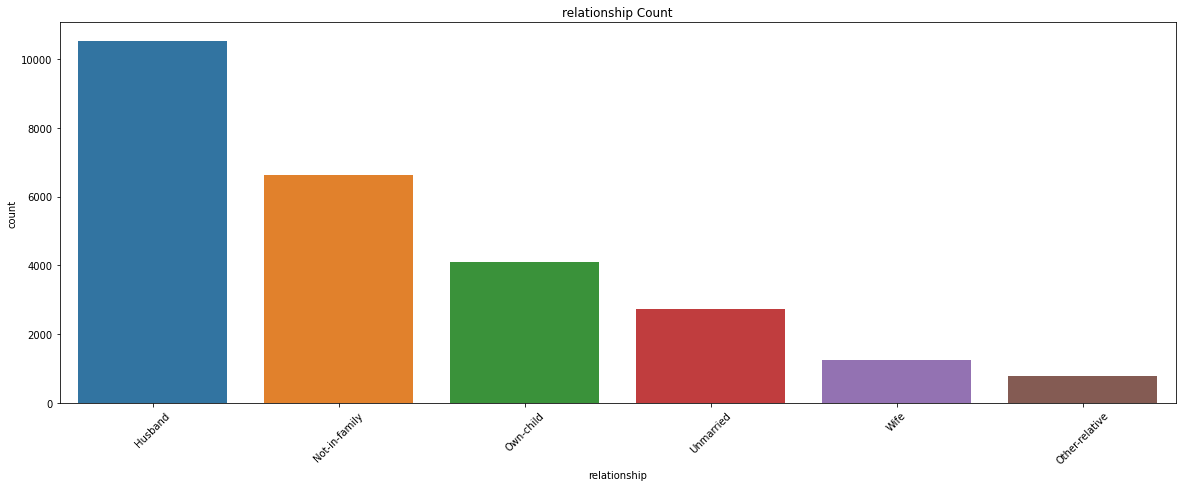

In [86]:
get_count(train, 'relationship')

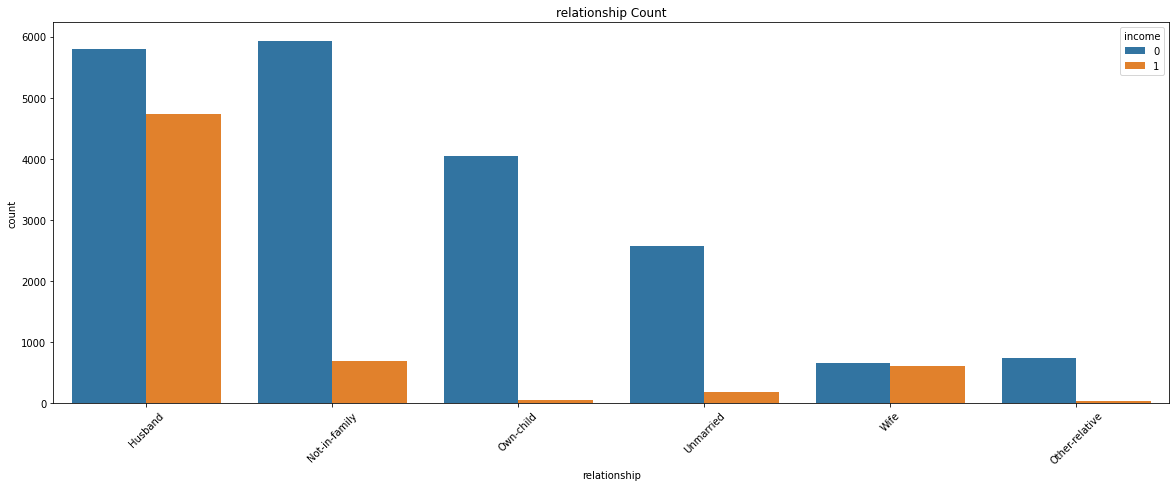

In [87]:
get_count(train, 'relationship', h=True)

## race : 인종

아시안과 백인이면 소득이 더 높은 경향이 있음

1. 1st_race
2. 2st_race
3. 3st_race

In [88]:
train.groupby('race').mean().sort_values(by='income', ascending=False)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
race,,,,,,,
Asian-Pac-Islander,37.635000,159715.247500,10.927500,1539.585000,110.333750,40.475000,0.268750
White,38.739727,187615.168138,10.142550,1137.329957,90.867533,40.683083,0.257271
Black,37.911551,230503.814216,9.503635,534.355008,58.561793,38.410743,0.121971
Amer-Indian-Eskimo,37.102362,122671.547244,9.322835,648.570866,41.846457,39.885827,0.114173
Other,33.392157,200738.980392,8.921569,1148.250000,67.382353,39.431373,0.088235


In [89]:
get_category(train, 'race')

race의 개수는 5

##########race의 종류#########
White                 22315
Black                  2476
Asian-Pac-Islander      800
Amer-Indian-Eskimo      254
Other                   204
Name: race, dtype: int64


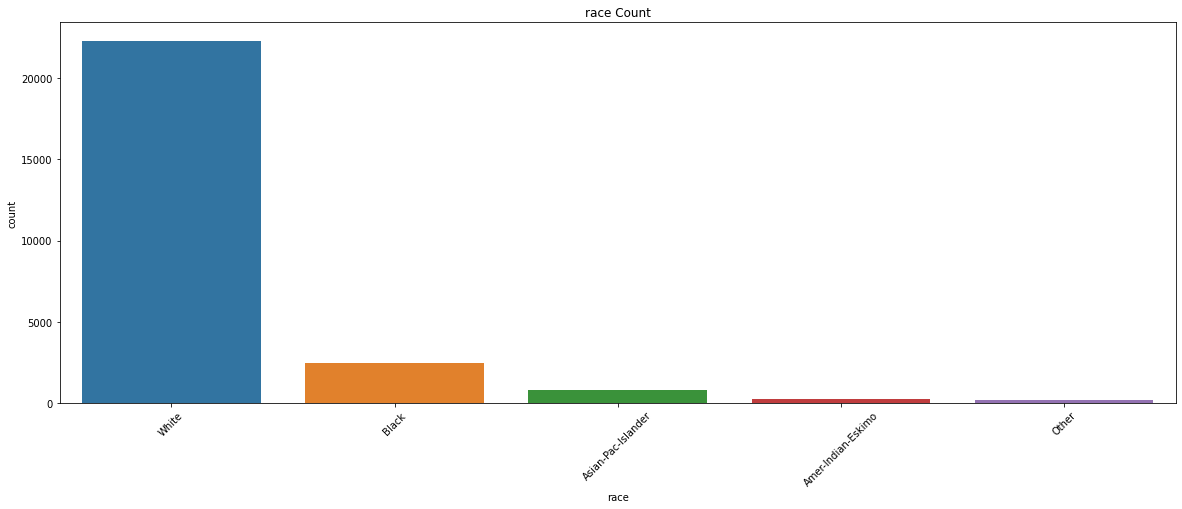

In [90]:
get_count(train, 'race')

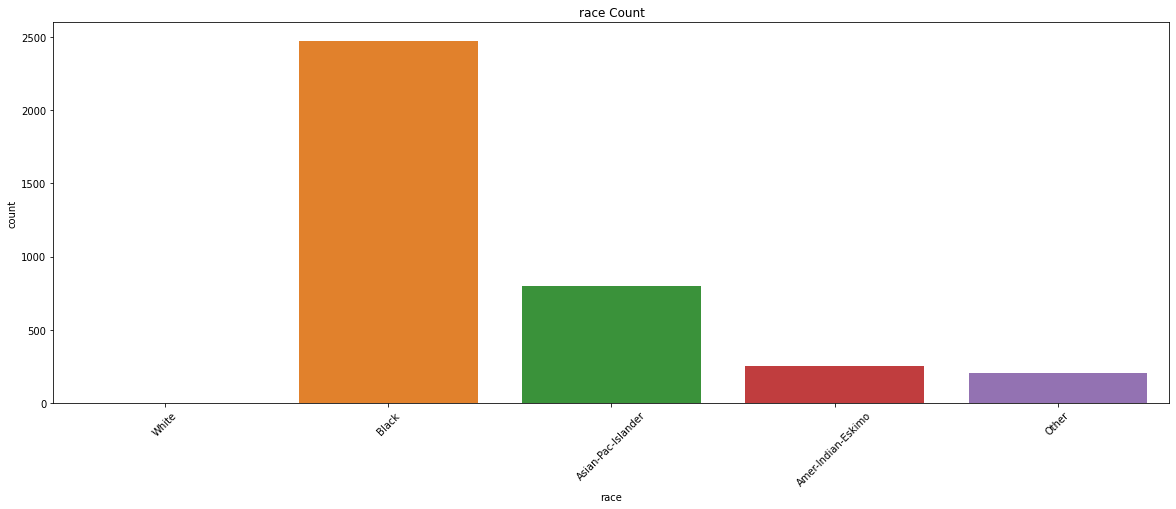

In [91]:
get_count_drop_col(train, 'race', 'White')

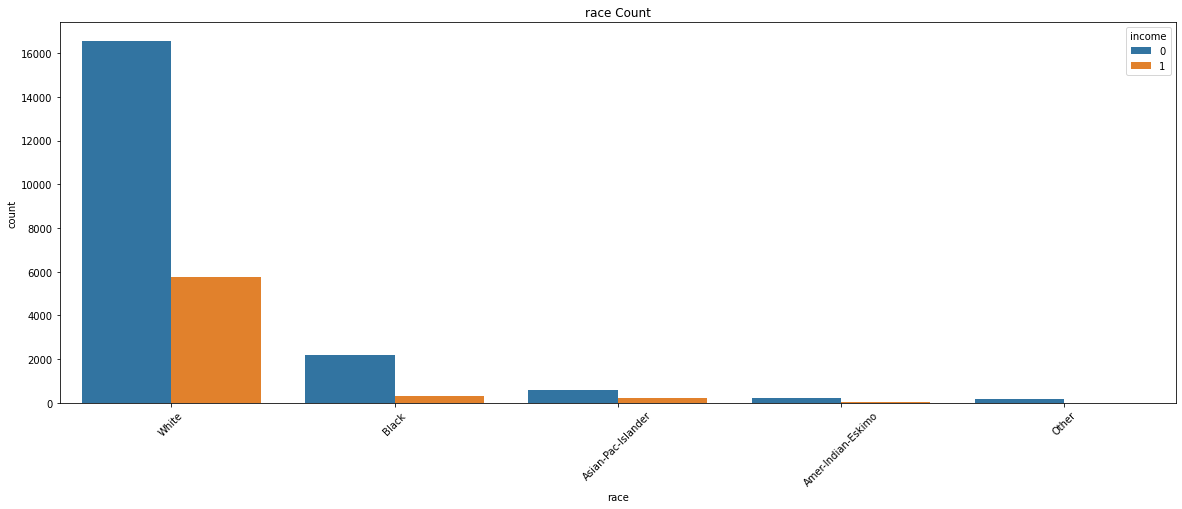

In [92]:
get_count(train, 'race', h=True)

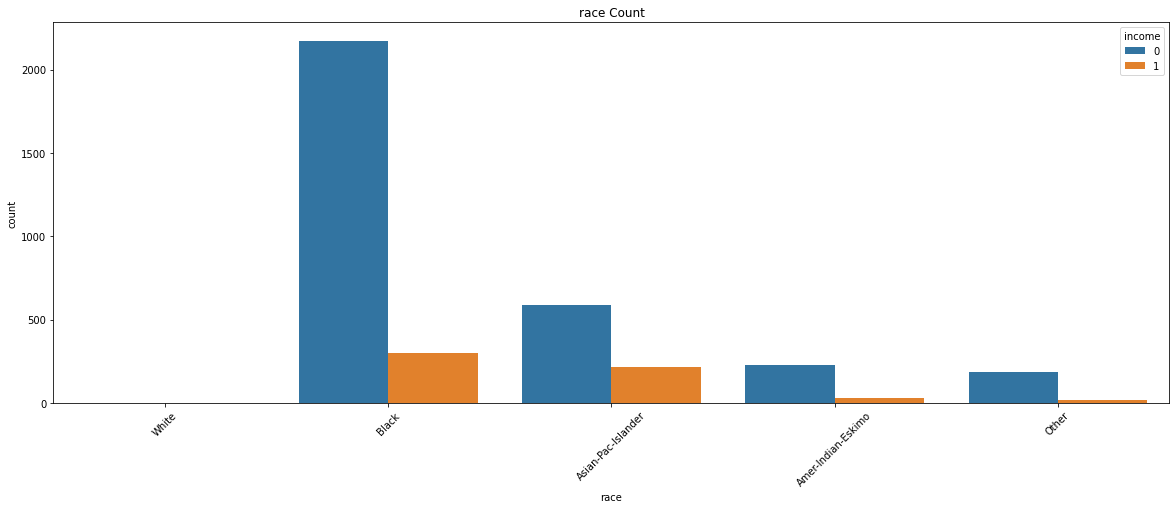

In [93]:
get_count_drop_col(train, 'race', 'White', h=True)

## sex : 성별

남성이 소득이 더 높은 경향이 있음

In [94]:
get_category(train, 'sex')

sex의 개수는 2

##########sex의 종류#########
Male      17482
Female     8567
Name: sex, dtype: int64


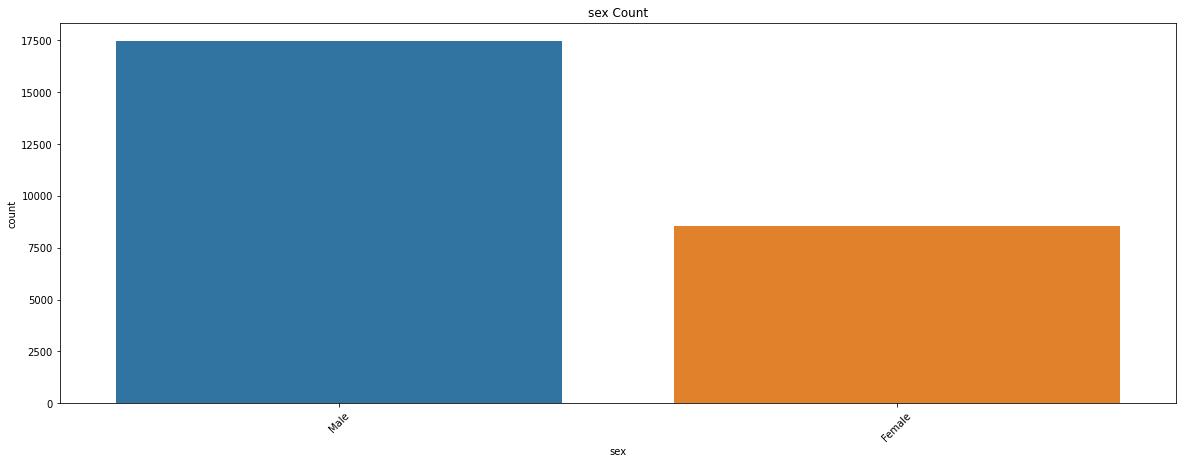

In [95]:
get_count(train, 'sex')

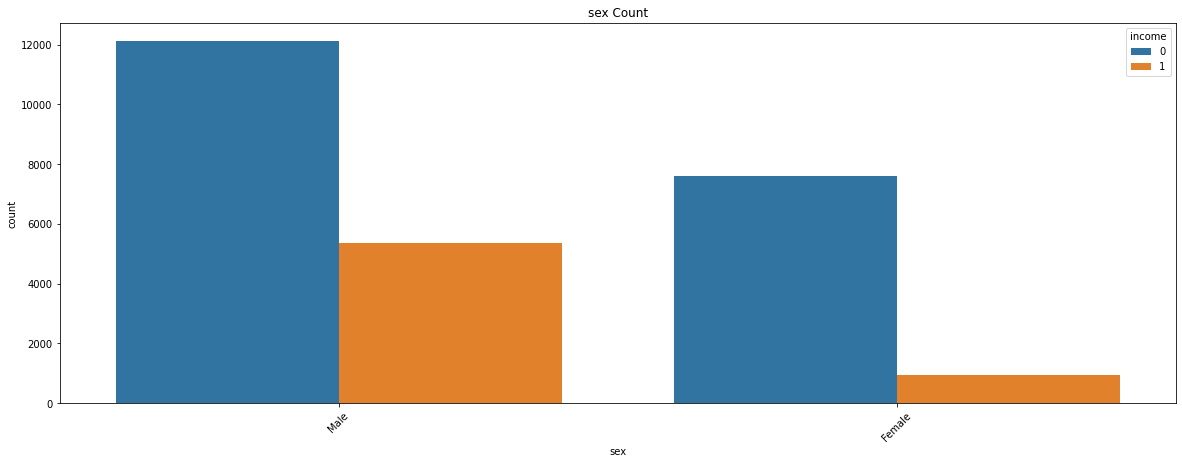

In [96]:
get_count(train, 'sex', h=True)

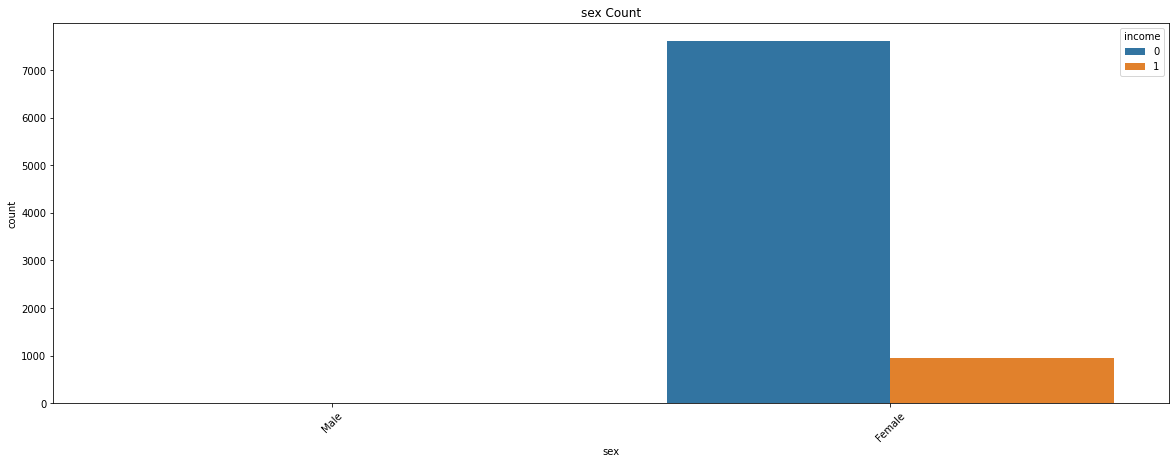

In [97]:
get_count_drop_col(train, 'sex', 'Male', h=True)

## capital_gain : 양도 소득 / capital_loss : 양도 손실

양도 소득이 6만 이상이면 소득이 매우 높음

+ capital_gain >= 60000 vs other

+ log변환

In [98]:
get_distribution(train, 'capital_gain')

capital_gain의 분포도와 기초통계량
count    26049.00000
mean      1087.68970
std       7388.85469
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      99999.00000
Name: capital_gain, dtype: float64


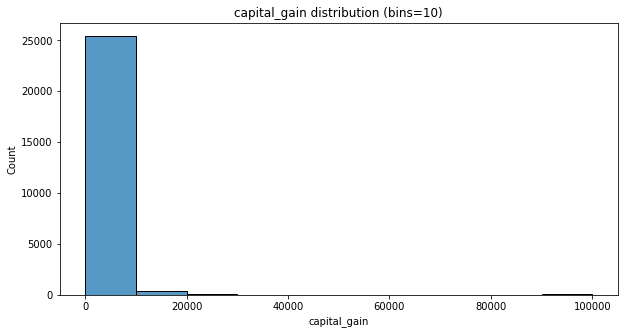

In [99]:
plot_hist(train, 'capital_gain', bins=10, h=False)

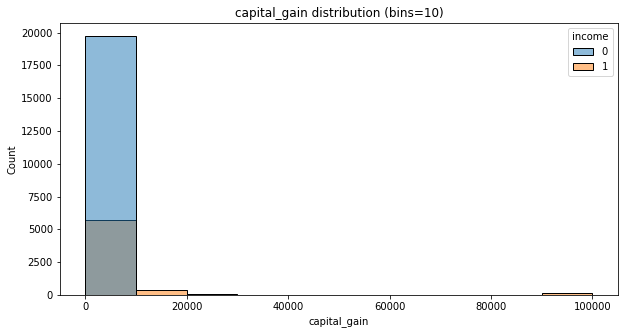

In [100]:
plot_hist(train, 'capital_gain', bins=10)

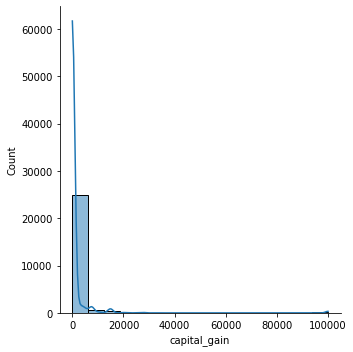

In [101]:
plot_dis(train, 'capital_gain', h=False)

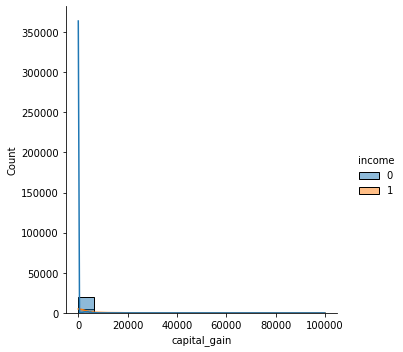

In [102]:
plot_dis(train, 'capital_gain', h=True)

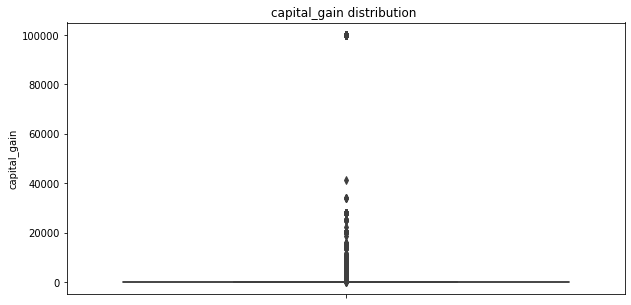

In [103]:
plot_box(train, 'capital_gain', h=False)

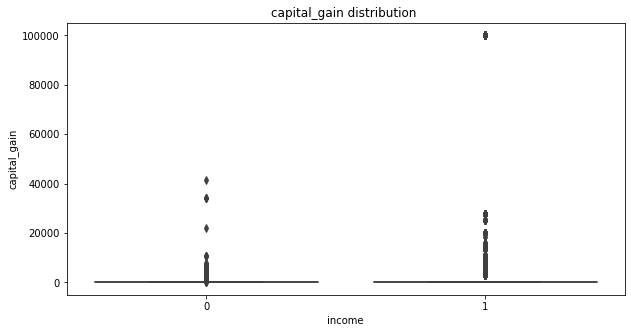

In [104]:
plot_box(train, 'capital_gain')

In [105]:
get_distribution(train, 'capital_loss')

capital_loss의 분포도와 기초통계량
count    26049.000000
mean        87.732734
std        403.230205
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64


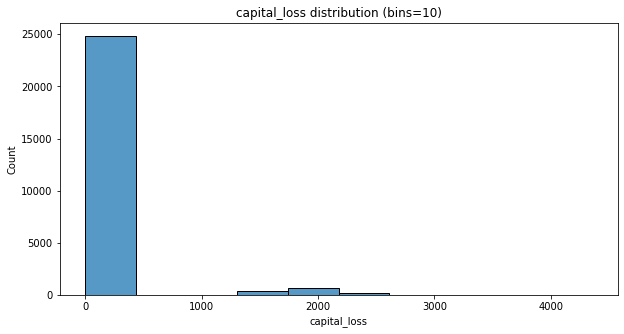

In [106]:
plot_hist(train, 'capital_loss', bins=10, h=False)

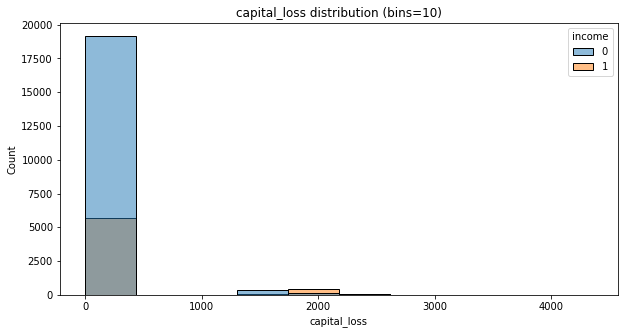

In [107]:
plot_hist(train, 'capital_loss', bins=10)

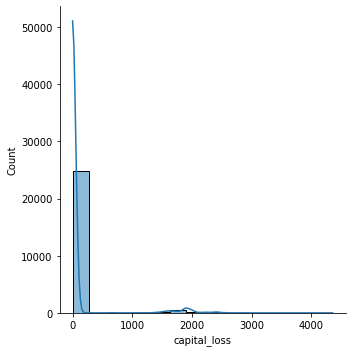

In [108]:
plot_dis(train, 'capital_loss', h=False)

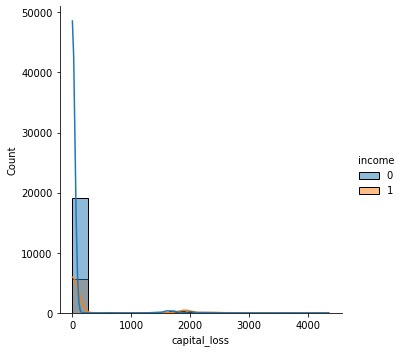

In [109]:
plot_dis(train, 'capital_loss', h=True)

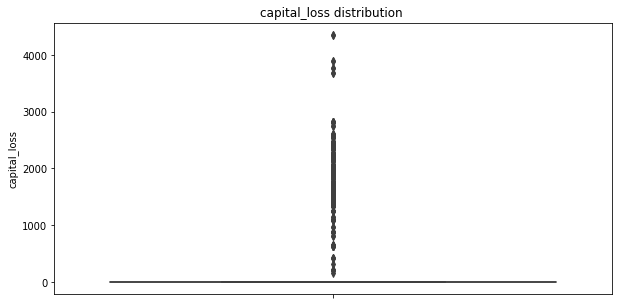

In [110]:
plot_box(train, 'capital_loss', h=False)

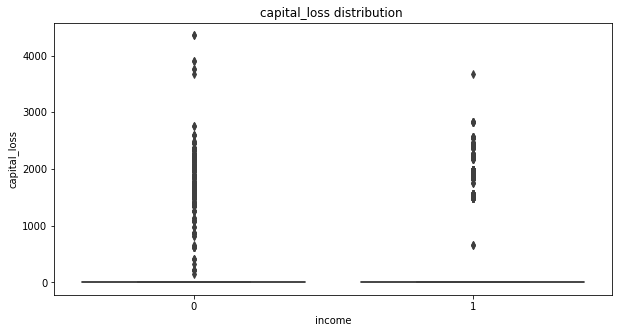

In [111]:
plot_box(train, 'capital_loss')

## hours_per_week : 주당 근무 시간

주당 근무 시간이 높을 수록 확실히 소득이 조금더 높은 경향이 존재함



In [112]:
get_distribution(train, 'hours_per_week')

hours_per_week의 분포도와 기초통계량
count    26049.000000
mean        40.443126
std         12.361850
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64


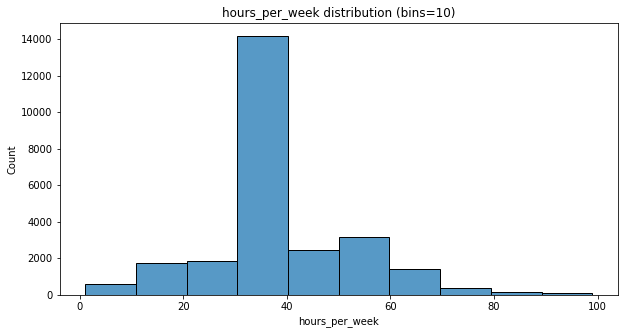

In [113]:
plot_hist(train, 'hours_per_week', bins=10, h=False)

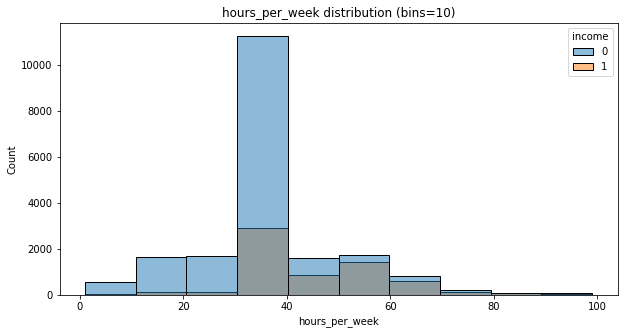

In [114]:
plot_hist(train, 'hours_per_week', bins=10)

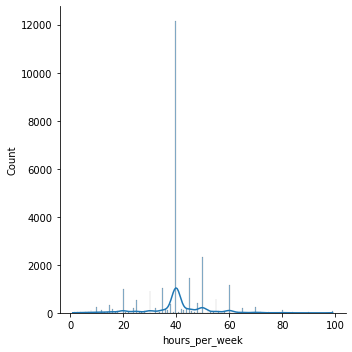

In [115]:
plot_dis(train, 'hours_per_week', h=False)

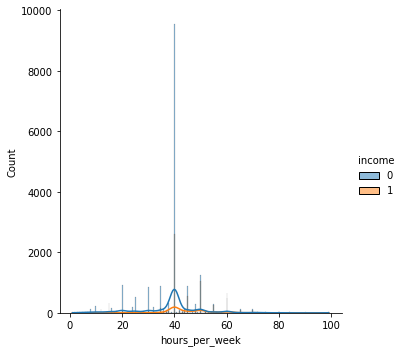

In [116]:
plot_dis(train, 'hours_per_week', h=True)

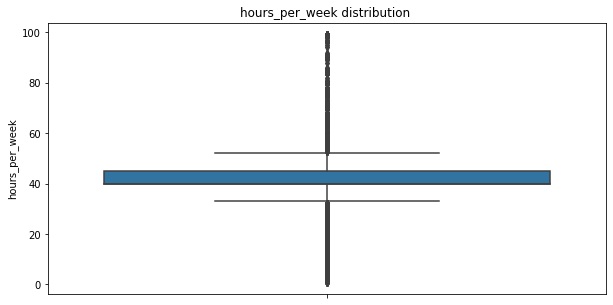

In [117]:
plot_box(train, 'hours_per_week', h=False)

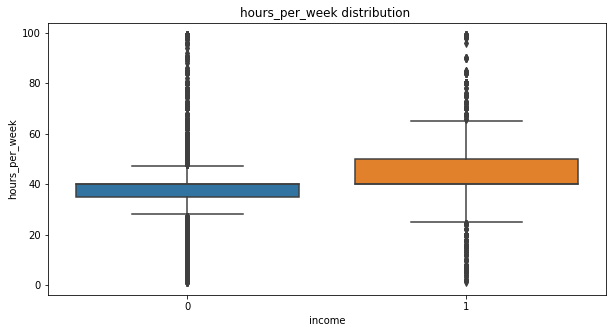

In [118]:
plot_box(train, 'hours_per_week')

## native_country : 국적

['Holand-Netherlands']가 test 데이터 에만 존재

소득에 따라 나라를 분리해주는 것이 좋을 것 같음

저소득, 중소득, 고소득 국가로 나눌 수 있을 듯

Holand-Netherlands는 네덜란드 이므로 그냥 모르겠지만 프랑스와 묶어주면 좋을 듯
0 other_country

0.1 very_low_country

0.2 low_country

0.3 mid_country

0.4 high_country + Holand-Netherlands

In [119]:
get_category(train, 'native_country')

native_country의 개수는 41

##########native_country의 종류#########
United-States                 23371
Mexico                          534
?                               456
Philippines                     163
Germany                         101
Puerto-Rico                      95
Canada                           92
El-Salvador                      79
India                            77
Cuba                             76
England                          67
Jamaica                          64
South                            63
China                            57
Columbia                         52
Guatemala                        52
Vietnam                          50
Italy                            50
Dominican-Republic               48
Japan                            47
Poland                           47
Taiwan                           39
Haiti                            35
Iran                             35
Portugal                         30
Nicaragua                        28
Pe

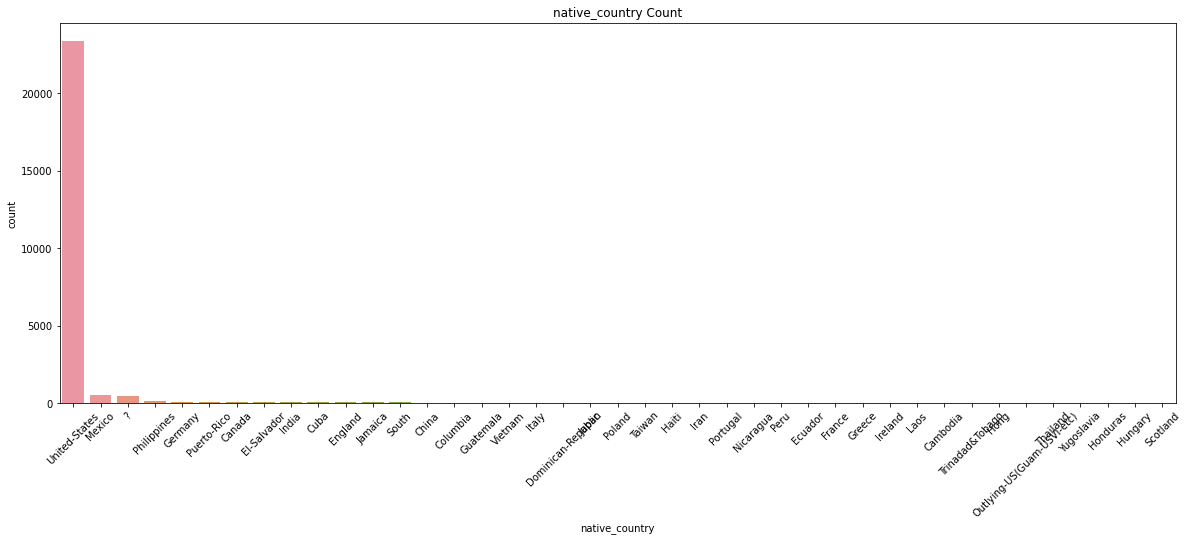

In [120]:
get_count(train, 'native_country')

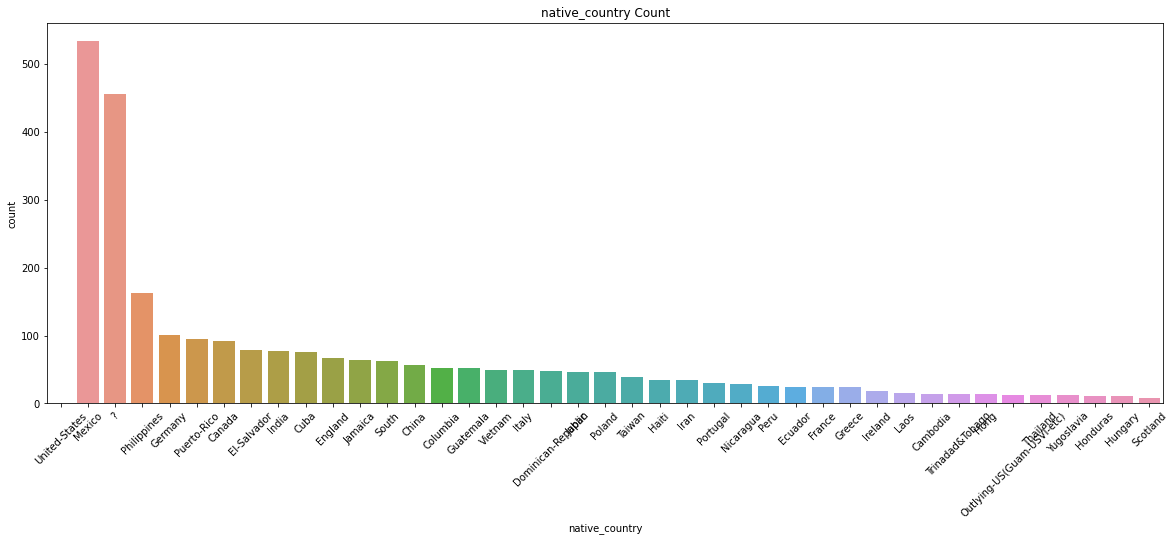

In [121]:
get_count_drop_col(train, 'native_country', 'United-States')

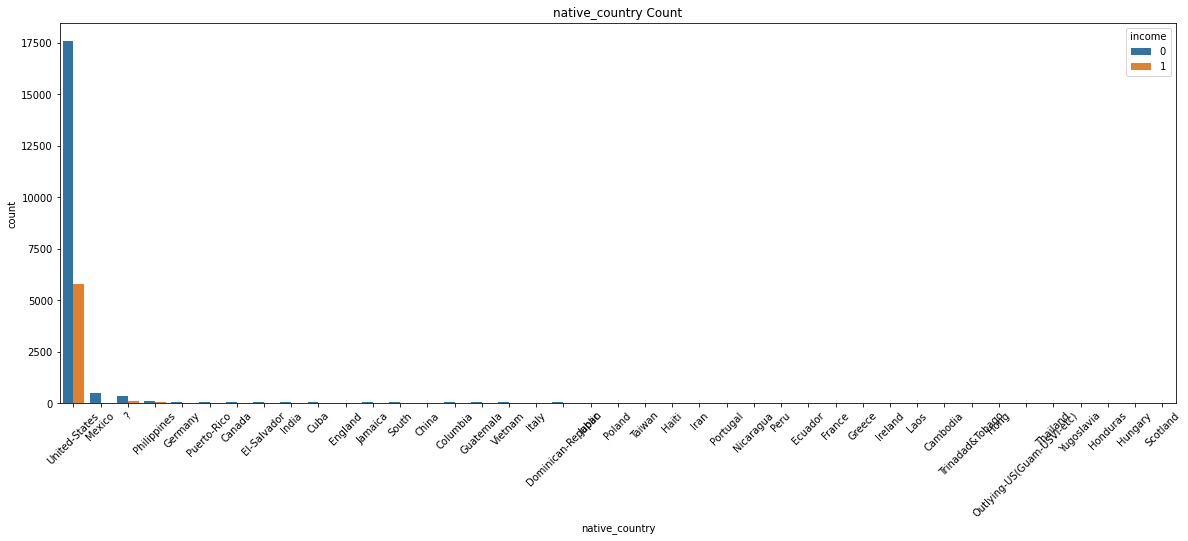

In [122]:
get_count(train, 'native_country', h=True)

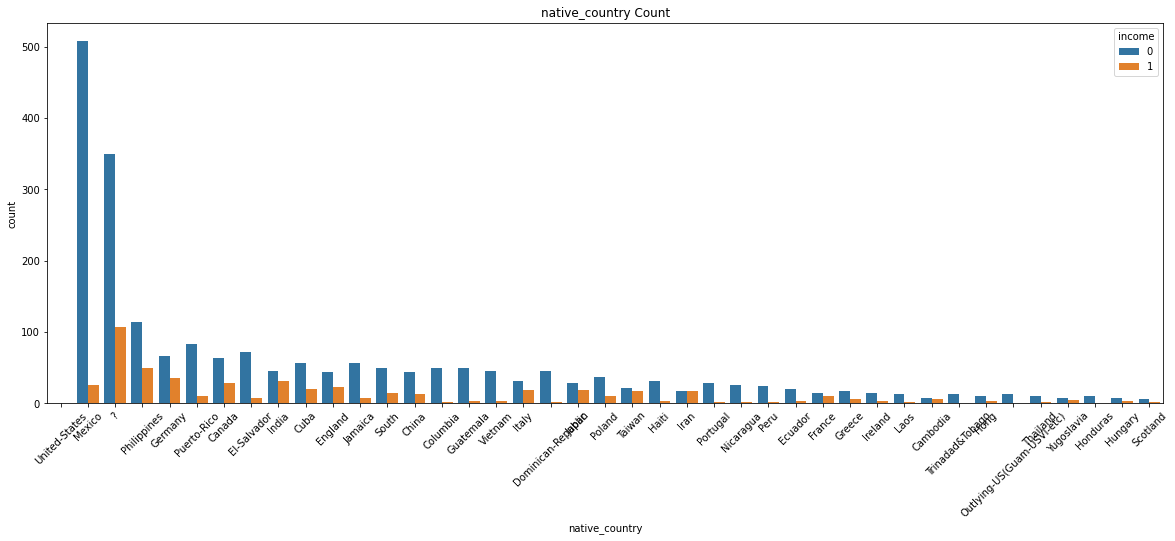

In [123]:
get_count_drop_col(train, 'native_country', 'United-States', h=True)

In [124]:
# 평균 소득이 높은 국가 낮은 국가로 나눌 수 있을 듯
train.groupby('native_country').mean()['income'].sort_values(ascending=False)

native_country
Iran                          0.485714
Taiwan                        0.461538
Cambodia                      0.428571
Yugoslavia                    0.416667
France                        0.416667
Japan                         0.404255
India                         0.402597
Italy                         0.380000
Germany                       0.346535
England                       0.343284
Canada                        0.315217
Philippines                   0.300613
Hong                          0.285714
Hungary                       0.272727
Cuba                          0.263158
Scotland                      0.250000
Greece                        0.250000
United-States                 0.247315
?                             0.234649
China                         0.228070
Ireland                       0.222222
South                         0.222222
Poland                        0.212766
Ecuador                       0.166667
Thailand                      0.153846
Laos      

# 데이터 전처리

In [125]:
def get_workclass(x):
  workclass_income_4 = ['Self-emp-inc']
  workclass_income_3 = ['Federal-gov']
  workclass_income_2 = ['Local-gov', 'Self-emp-not-inc', 'State-gov', 'Private']
  workclass_income_1 = ['?'] 
  workclass_income_others = ['Never-worked', 'Without-pay']

  if x in workclass_income_4:
    return 'workclass_income_4'

  if x in workclass_income_3:
    return 'workclass_income_3'

  if x in workclass_income_2:
    return 'workclass_income_2'

  if x in workclass_income_1:
    return 'workclass_income_1'

  if x in workclass_income_others:
    return 'workclass_income_others'

In [126]:
def get_education_num(x):
  if x >= 15:
    return 'level_6'
  elif x >= 13:
    return 'level_5'
  elif x >= 11:
    return 'level_4'
  elif x >= 9:
    return 'level_3'
  elif x >= 2:
    return 'level_2'
  else:
    return 'level_1'

In [127]:
def get_marital_status(x):
  married = ['Married-AF-spouse', 'Married-civ-spouse']
  
  if x in married:
    return 'married'
  else:
    return 'others'

In [128]:
def get_occupation(x):
  high_occupation = ['Exec-managerial', 'Prof-specialty'] 
  high_mid_occupation = ['Protective-serv', 'Tech-support']
  mid_occupation = ['Sales', 'Craft-repair']
  mid_low_occupation = ['Transport-moving', 'Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', '?']
  low_occupation = ['Handlers-cleaners', 'Other-service', 'Priv-house-serv'] 
  other_occupation = ['Armed-Forces']

  if x in high_occupation:
    return 'high_occupation'

  if x in high_mid_occupation:
    return 'high_mid_occupation'

  if x in mid_occupation:
    return 'mid_occupation'

  if x in mid_low_occupation:
    return 'mid_low_occupation'

  if x in low_occupation:
    return 'low_occupation'

  if x in other_occupation:
    return 'other_occupation'

In [129]:
def get_relationship(x):
  family = ['Wife', 'Husband']
  
  if x in family:
    return 'family'
  else:
    return 'others'

In [130]:
def get_race(x):
  race_1st = ['Asian-Pac-Islander', 'White']
  race_2st = ['Black', 'Amer-Indian-Eskimo']
  if x in race_1st:
    return 'race_1st'
  elif x in race_2st:
    return 'race_2st'
  else:
    return 'others'

In [131]:
def get_rich(x):
  if x >= 60000:
    return 1
  else:
    return 0

In [132]:
def get_native_country(x):
  high_country = ['Iran', 'Taiwan', 'Cambodia', 'Yugoslavia', 'France', 'Japan', 'India', 'Holand-Netherlands']

  high_mid_country = ['Italy', 'Germany', 'England', 'Canada', 'Philippines']

  mid_country = ['Hong',
       'Hungary', 'Cuba', 'Scotland', 'Greece', 'United-States', '?', 'China',
       'Ireland', 'South', 'Poland']

  low_country = ['Ecuador', 'Thailand', 'Laos', 'Puerto-Rico', 'Haiti', 'Jamaica']

  very_low_country = ['El-Salvador', 'Vietnam', 'Peru', 'Nicaragua', 'Trinadad&Tobago', 'Portugal', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Columbia']

  other_country = ['Honduras', 'Outlying-US(Guam-USVI-etc)']

  if x in high_country:
    return 'high_country'

  if x in high_mid_country:
    return 'high_mid_country'
    
  if x in mid_country:
    return 'mid_country'

  if x in low_country:
    return 'low_country'

  if x in very_low_country:
    return 'very_low_country'

  if x in other_country:
    return 'other_country'

In [133]:
# 전처리 함수 만들기
def dataPreprocessing(train, test):
  # 데이터 복사
  tmp_train = train.copy()
  tmp_test = test.copy()

  label = tmp_train.iloc[:, -1]

  # income 삭제
  del tmp_train['income']

  # fnlwgt 삭제
  del tmp_train['fnlwgt']
  del tmp_test['fnlwgt']

  # age 로그 변환
  tmp_train['age'] = train.age.map(lambda x : np.log(x) if x != 0 else 0)
  tmp_test['age'] = test.age.map(lambda x : np.log(x) if x != 0 else 0)

  # workclass 범주화
  tmp_train['workclass'] = train.workclass.map(lambda x : get_workclass(x))
  tmp_test['workclass'] = test.workclass.map(lambda x : get_workclass(x))

  # education_num 범주화
  tmp_train['education'] = train['education_num'].map(lambda x : get_education_num(x))
  tmp_test['education'] = test['education_num'].map(lambda x : get_education_num(x))
  del tmp_train['education_num']
  del tmp_test['education_num']

  # marital_status 범주화
  tmp_train['marital_status']= train['marital_status'].map(lambda x : get_marital_status(x))
  tmp_test['marital_status']= test['marital_status'].map(lambda x : get_marital_status(x))

  # occupation의 범주화
  tmp_train['occupation'] = train['occupation'].map(lambda x : get_occupation(x))
  tmp_test['occupation'] = test['occupation'].map(lambda x : get_occupation(x))

  # relationship의 범주화
  tmp_train['relationship'] = train['relationship'].map(lambda x : get_relationship(x))
  tmp_test['relationship'] = test['relationship'].map(lambda x : get_relationship(x))

  # race의 범주화
  tmp_train['race'] = train['race'].map(lambda x : get_race(x))
  tmp_test['race'] = test['race'].map(lambda x : get_race(x))

  # capital_gain 로그 변환
  tmp_train['capital_gain'] = train['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
  tmp_test['capital_gain'] = test['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)

  # capital_loss 로그 변환
  tmp_train['capital_loss'] = train['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
  tmp_test['capital_loss'] = test['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)

  # 새로운 변수를 추가 (rich)
  tmp_train['rich'] = train['capital_gain'].map(lambda x : get_rich(x))
  tmp_test['rich'] = test['capital_gain'].map(lambda x : get_rich(x))

  # hours_per_week 로그 변환
  tmp_train['hours_per_week'] = train['hours_per_week'].map(lambda x : np.log(x) if x != 0 else 0)
  tmp_test['hours_per_week'] = test['hours_per_week'].map(lambda x : np.log(x) if x != 0 else 0)

  # native_country 범주화
  tmp_train['native_country'] = train['native_country'].map(lambda x : get_native_country(x))
  tmp_test['native_country'] = test['native_country'].map(lambda x : get_native_country(x))

  return tmp_train, tmp_test, label

# 모델 학습 및 평가

## 라벨 인코더

In [134]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook

def labelEncoder(trn_data, val_data, X_test):
  tem_trn_data = trn_data.copy()
  tem_val_data = val_data.copy()
  tmp_X_test = X_test.copy()
  tmp_all = pd.concat([tem_trn_data, tem_val_data, tmp_X_test])

  cat_columns = [c for c, t in zip(tmp_all.dtypes.index, tmp_all.dtypes) if t == 'O'] 
  num_columns = [c for c in tmp_all.dtypes.index if c not in cat_columns]

  lbl = LabelEncoder()

  for col in tqdm_notebook(cat_columns):
    lbl.fit(tmp_all[col])
    tem_trn_data[col] = lbl.transform(tem_trn_data[col])
    tem_val_data[col] = lbl.transform(tem_val_data[col])
    tmp_X_test[col] = lbl.transform(tmp_X_test[col])

  return tem_trn_data, tem_val_data, tmp_X_test

In [135]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_train, X_test, y_train = dataPreprocessing(train, test)

rf_oof_train = np.zeros_like(y_train)
lgr_oof_train = np.zeros_like(y_train)
lg_oof_train = np.zeros_like(y_train)
dt_oof_train = np.zeros_like(y_train)
xg_oof_train = np.zeros_like(y_train)

rf_oof_test = np.zeros((X_test.shape[0],))
lgr_oof_test = np.zeros((X_test.shape[0],))
lg_oof_test = np.zeros((X_test.shape[0],))
dt_oof_test = np.zeros((X_test.shape[0],))
xg_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(X_train, y_train))) :
    trn_data, trn_label = X_train.iloc[trn_idx], y_train[trn_idx]
    val_data, val_label = X_train.iloc[val_idx], y_train[val_idx]

    trn_data, val_data, x_test = labelEncoder(trn_data, val_data, X_test)

    # RandomForestClassifier
    rf = RandomForestClassifier(random_state=22)
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict(val_data)
    rf_oof_train[val_idx] = rf_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    rf_oof_test += pred / n_split

    # LogisticRegression
    lgr = LogisticRegression(random_state=22)
    lgr.fit(trn_data, trn_label)
    lgr_valid_pred = lgr.predict(val_data)
    lgr_oof_train[val_idx] = lgr_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    lgr_oof_test += pred / n_split

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict(val_data)
    lg_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(x_test)[:, 1]
    lg_oof_test += pred / n_split

    # DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=22)
    dt.fit(trn_data, trn_label)
    dt_valid_pred = dt.predict(val_data)
    dt_oof_train[val_idx] = dt_valid_pred

    pred = dt.predict_proba(x_test)[:, 1]
    dt_oof_test += pred / n_split

    # xgboost
    xg = xgb.XGBRFClassifier(random_state=22)
    xg.fit(trn_data, trn_label)
    xg_valid_pred = xg.predict(val_data)
    xg_oof_train[val_idx] = xg_valid_pred

    pred = xg.predict_proba(x_test)[:, 1] / n_split
    xg_oof_test += pred

### 모델 정확도

In [137]:
from sklearn.metrics import accuracy_score, f1_score

print("lightgbm                      :{} ".format(f1_score(label, lg_oof_train, average='micro')))
print("RandomForestClassifier        :{} ".format(f1_score(label, rf_oof_train, average='micro')))
print("DecisionTreeClassifier        :{} ".format(f1_score(label, dt_oof_train, average='micro')))
print("xgboost                       :{} ".format(f1_score(label, xg_oof_train, average='micro')))
print("LogisticRegression            :{} ".format(f1_score(label, lgr_oof_train, average='micro')))

lightgbm                      :0.8692080310184652 
RandomForestClassifier        :0.8444086145341472 
DecisionTreeClassifier        :0.8259434143345235 
xgboost                       :0.8426811010019578 
LogisticRegression            :0.8385350685247035 


In [138]:
submission['prediction'] = (lg_oof_test > 0.5).astype(int)
submission.to_csv('label_encoder_Model.csv', index=False)

## 원핫 인코더

In [139]:
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm_notebook

def oneHotEncoder(trn_data, val_data, X_test):
  tem_trn_data = trn_data.copy()
  tem_val_data = val_data.copy()
  tmp_X_test = X_test.copy()
  
  tem_trn_data = tem_trn_data.reset_index(drop=True)
  tem_val_data = tem_val_data.reset_index(drop=True)
  tmp_X_test  = tmp_X_test.reset_index(drop=True)

  tmp_all = pd.concat([tem_trn_data, tem_val_data, tmp_X_test])

  cat_columns = [c for c, t in zip(tmp_all.dtypes.index, tmp_all.dtypes) if t == 'O'] 
  num_columns = [c for c in tmp_all.dtypes.index if c not in cat_columns]

  ohe = OneHotEncoder(sparse=False)
  ohe.fit(tmp_all[cat_columns])

  ohe_columns = list()
  for col, lst in zip(cat_columns, ohe.categories_):
    for i in lst:
      ohe_columns.append(col+'_'+i)

  tmp_train_cat = pd.DataFrame(ohe.transform(tem_trn_data[cat_columns]), columns=ohe_columns)
  tmp_valid_cat = pd.DataFrame(ohe.transform(tem_val_data[cat_columns]), columns=ohe_columns)
  tmp_test_cat = pd.DataFrame(ohe.transform(tmp_X_test[cat_columns]), columns=ohe_columns)

  tmp_x_train = pd.concat([tem_trn_data, tmp_train_cat], axis=1)
  tmp_x_valid = pd.concat([tem_val_data, tmp_valid_cat], axis=1)
  tmp_x_test = pd.concat([tmp_X_test, tmp_test_cat], axis=1)

  tmp_x_train = tmp_x_train.drop(columns=cat_columns)
  tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
  tmp_x_test = tmp_x_test.drop(columns=cat_columns)

  return tmp_x_train, tmp_x_valid, tmp_x_test

In [140]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_train, X_test, y_train = dataPreprocessing(train, test)

rf_oof_train = np.zeros_like(y_train)
lgr_oof_train = np.zeros_like(y_train)
lg_oof_train = np.zeros_like(y_train)
dt_oof_train = np.zeros_like(y_train)
xg_oof_train = np.zeros_like(y_train)

rf_oof_test = np.zeros((X_test.shape[0],))
lgr_oof_test = np.zeros((X_test.shape[0],))
lg_oof_test = np.zeros((X_test.shape[0],))
dt_oof_test = np.zeros((X_test.shape[0],))
xg_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(X_train, y_train))) :
    trn_data, trn_label = X_train.iloc[trn_idx], y_train[trn_idx]
    val_data, val_label = X_train.iloc[val_idx], y_train[val_idx]

    trn_data, val_data, x_test = oneHotEncoder(trn_data, val_data, X_test)

    # RandomForestClassifier
    rf = RandomForestClassifier(random_state=22)
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict(val_data)
    rf_oof_train[val_idx] = rf_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    rf_oof_test += pred / n_split

    # LogisticRegression
    lgr = LogisticRegression(random_state=22)
    lgr.fit(trn_data, trn_label)
    lgr_valid_pred = lgr.predict(val_data)
    lgr_oof_train[val_idx] = lgr_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    lgr_oof_test += pred / n_split

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict(val_data)
    lg_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(x_test)[:, 1]
    lg_oof_test += pred / n_split

    # DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=22)
    dt.fit(trn_data, trn_label)
    dt_valid_pred = dt.predict(val_data)
    dt_oof_train[val_idx] = dt_valid_pred

    pred = dt.predict_proba(x_test)[:, 1]
    dt_oof_test += pred / n_split

    # xgboost
    xg = xgb.XGBRFClassifier(random_state=22)
    xg.fit(trn_data, trn_label)
    xg_valid_pred = xg.predict(val_data)
    xg_oof_train[val_idx] = xg_valid_pred

    pred = xg.predict_proba(x_test)[:, 1] / n_split
    xg_oof_test += pred

### 모델 정확도

In [142]:
from sklearn.metrics import accuracy_score, f1_score

print("lightgbm                      :{} ".format(f1_score(label, lg_oof_train, average='micro')))
print("RandomForestClassifier        :{} ".format(f1_score(label, rf_oof_train, average='micro')))
print("DecisionTreeClassifier        :{} ".format(f1_score(label, dt_oof_train, average='micro')))
print("xgboost                       :{} ".format(f1_score(label, xg_oof_train, average='micro')))
print("LogisticRegression            :{} ".format(f1_score(label, lgr_oof_train, average='micro')))

lightgbm                      :0.8687857499328189 
RandomForestClassifier        :0.8424123766747283 
DecisionTreeClassifier        :0.8276325386771084 
xgboost                       :0.8394947982648087 
LogisticRegression            :0.842373987485124 


In [143]:
submission['prediction'] = (lg_oof_test > 0.5).astype(int)
submission.to_csv('onehot_encoder_Model.csv', index=False)

# 스택킹

In [144]:
m = np.zeros((y_train.shape[0],))

In [145]:
m[[1,2,5]]

array([0., 0., 0.])

## 라벨 인코더

In [146]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook

def labelEncoder(trn_data, val_data, X_test):
  tem_trn_data = trn_data.copy()
  tem_val_data = val_data.copy()
  tmp_X_test = X_test.copy()
  tmp_all = pd.concat([tem_trn_data, tem_val_data, tmp_X_test])

  cat_columns = [c for c, t in zip(tmp_all.dtypes.index, tmp_all.dtypes) if t == 'O'] 
  num_columns = [c for c in tmp_all.dtypes.index if c not in cat_columns]

  lbl = LabelEncoder()

  for col in tqdm_notebook(cat_columns):
    lbl.fit(tmp_all[col])
    tem_trn_data[col] = lbl.transform(tem_trn_data[col])
    tem_val_data[col] = lbl.transform(tem_val_data[col])
    tmp_X_test[col] = lbl.transform(tmp_X_test[col])

  return tem_trn_data, tem_val_data, tmp_X_test

### 개별 모델

In [147]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_train, X_test, y_train = dataPreprocessing(train, test)

rf_oof_train = np.zeros((y_train.shape[0],))
lgr_oof_train = np.zeros((y_train.shape[0],))
lg_oof_train = np.zeros((y_train.shape[0],))
dt_oof_train = np.zeros((y_train.shape[0],))
xg_oof_train = np.zeros((y_train.shape[0],))

rf_oof_test = np.zeros((X_test.shape[0],))
lgr_oof_test = np.zeros((X_test.shape[0],))
lg_oof_test = np.zeros((X_test.shape[0],))
dt_oof_test = np.zeros((X_test.shape[0],))
xg_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(X_train, y_train))) :
    trn_data, trn_label = X_train.iloc[trn_idx], y_train[trn_idx]
    val_data, val_label = X_train.iloc[val_idx], y_train[val_idx]

    trn_data, val_data, x_test = labelEncoder(trn_data, val_data, X_test)

    # RandomForestClassifier
    rf = RandomForestClassifier(random_state=22)
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict_proba(val_data)[:, 1]
    rf_oof_train[val_idx] = rf_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    rf_oof_test += pred / n_split

    # LogisticRegression
    lgr = LogisticRegression(random_state=22)
    lgr.fit(trn_data, trn_label)
    lgr_valid_pred = lgr.predict_proba(val_data)[:, 1]
    lgr_oof_train[val_idx] = lgr_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    lgr_oof_test += pred / n_split

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict_proba(val_data)[:, 1]
    lg_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(x_test)[:, 1]
    lg_oof_test += pred / n_split

    # DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=22)
    dt.fit(trn_data, trn_label)
    dt_valid_pred = dt.predict_proba(val_data)[:, 1]
    dt_oof_train[val_idx] = dt_valid_pred

    pred = dt.predict_proba(x_test)[:, 1]
    dt_oof_test += pred / n_split

    # xgboost
    xg = xgb.XGBRFClassifier(random_state=22)
    xg.fit(trn_data, trn_label)
    xg_valid_pred = xg.predict_proba(val_data)[:, 1]
    xg_oof_train[val_idx] = xg_valid_pred

    pred = xg.predict_proba(x_test)[:, 1] / n_split
    xg_oof_test += pred

### 메타 모델

In [149]:
new_x_train_list = [rf_oof_train.reshape(-1,1),
                    lgr_oof_train.reshape(-1,1),
                    lg_oof_train.reshape(-1,1),
                    dt_oof_train.reshape(-1,1),
                    xg_oof_train.reshape(-1,1)]

new_x_test_list = [rf_oof_test.reshape(-1,1),
                    lgr_oof_test.reshape(-1,1),
                    lg_oof_test.reshape(-1,1),
                    dt_oof_test.reshape(-1,1),
                    xg_oof_test.reshape(-1,1)]

new_train = pd.DataFrame(np.concatenate(new_x_train_list, axis=1), columns=None)
new_test = pd.DataFrame(np.concatenate(new_x_test_list, axis=1), columns=None)
new_label = y_train

In [150]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [151]:
import lightgbm as lgbm

new_oof_train = np.zeros((new_label.shape[0],))

new_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(new_train, new_label))) :
    trn_data, trn_label = new_train.iloc[trn_idx, :], new_label[trn_idx]
    val_data, val_label = new_train.iloc[val_idx, :], new_label[val_idx]

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict(val_data)
    new_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(new_test)[:, 1] / n_split
    new_oof_test += pred

### 모델 정확도

In [152]:
from sklearn.metrics import accuracy_score, f1_score
print("lightgbm                      :{} ".format(f1_score(new_label, new_oof_train, average='micro')))

lightgbm                      :0.866405620177358 


In [153]:
submission['prediction'] = (new_oof_test >= 0.5).astype(int)
submission.to_csv('label_encoder_stacking_Model.csv', index=False)

## 원핫 인코더

In [154]:
from sklearn.preprocessing import OneHotEncoder
from tqdm import tqdm_notebook

def oneHotEncoder(trn_data, val_data, X_test):
  tem_trn_data = trn_data.copy()
  tem_val_data = val_data.copy()
  tmp_X_test = X_test.copy()
  
  tem_trn_data = tem_trn_data.reset_index(drop=True)
  tem_val_data = tem_val_data.reset_index(drop=True)
  tmp_X_test  = tmp_X_test.reset_index(drop=True)

  tmp_all = pd.concat([tem_trn_data, tem_val_data, tmp_X_test])

  cat_columns = [c for c, t in zip(tmp_all.dtypes.index, tmp_all.dtypes) if t == 'O'] 
  num_columns = [c for c in tmp_all.dtypes.index if c not in cat_columns]

  ohe = OneHotEncoder(sparse=False)
  ohe.fit(tmp_all[cat_columns])

  ohe_columns = list()
  for col, lst in zip(cat_columns, ohe.categories_):
    for i in lst:
      ohe_columns.append(col+'_'+i)

  tmp_train_cat = pd.DataFrame(ohe.transform(tem_trn_data[cat_columns]), columns=ohe_columns)
  tmp_valid_cat = pd.DataFrame(ohe.transform(tem_val_data[cat_columns]), columns=ohe_columns)
  tmp_test_cat = pd.DataFrame(ohe.transform(tmp_X_test[cat_columns]), columns=ohe_columns)

  tmp_x_train = pd.concat([tem_trn_data, tmp_train_cat], axis=1)
  tmp_x_valid = pd.concat([tem_val_data, tmp_valid_cat], axis=1)
  tmp_x_test = pd.concat([tmp_X_test, tmp_test_cat], axis=1)

  tmp_x_train = tmp_x_train.drop(columns=cat_columns)
  tmp_x_valid = tmp_x_valid.drop(columns=cat_columns)
  tmp_x_test = tmp_x_test.drop(columns=cat_columns)

  return tmp_x_train, tmp_x_valid, tmp_x_test

### 개별 모델

In [155]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_train, X_test, y_train = dataPreprocessing(train, test)

rf_oof_train = np.zeros((y_train.shape[0],))
lgr_oof_train = np.zeros((y_train.shape[0],))
lg_oof_train = np.zeros((y_train.shape[0],))
dt_oof_train = np.zeros((y_train.shape[0],))
xg_oof_train = np.zeros((y_train.shape[0],))

rf_oof_test = np.zeros((X_test.shape[0],))
lgr_oof_test = np.zeros((X_test.shape[0],))
lg_oof_test = np.zeros((X_test.shape[0],))
dt_oof_test = np.zeros((X_test.shape[0],))
xg_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(X_train, y_train))) :
    trn_data, trn_label = X_train.iloc[trn_idx], y_train[trn_idx]
    val_data, val_label = X_train.iloc[val_idx], y_train[val_idx]

    trn_data, val_data, x_test = oneHotEncoder(trn_data, val_data, X_test)

    # RandomForestClassifier
    rf = RandomForestClassifier(random_state=22)
    rf.fit(trn_data, trn_label)
    rf_valid_pred = rf.predict_proba(val_data)[:, 1]
    rf_oof_train[val_idx] = rf_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    rf_oof_test += pred / n_split

    # LogisticRegression
    lgr = LogisticRegression(random_state=22)
    lgr.fit(trn_data, trn_label)
    lgr_valid_pred = lgr.predict_proba(val_data)[:, 1]
    lgr_oof_train[val_idx] = lgr_valid_pred

    pred = rf.predict_proba(x_test)[:, 1]
    lgr_oof_test += pred / n_split

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict_proba(val_data)[:, 1]
    lg_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(x_test)[:, 1]
    lg_oof_test += pred / n_split

    # DecisionTreeClassifier
    dt = DecisionTreeClassifier(random_state=22)
    dt.fit(trn_data, trn_label)
    dt_valid_pred = dt.predict_proba(val_data)[:, 1]
    dt_oof_train[val_idx] = dt_valid_pred

    pred = dt.predict_proba(x_test)[:, 1]
    dt_oof_test += pred / n_split

    # xgboost
    xg = xgb.XGBRFClassifier(random_state=22)
    xg.fit(trn_data, trn_label)
    xg_valid_pred = xg.predict_proba(val_data)[:, 1]
    xg_oof_train[val_idx] = xg_valid_pred

    pred = xg.predict_proba(x_test)[:, 1] / n_split
    xg_oof_test += pred

### 메타 모델

In [157]:
new_x_train_list = [rf_oof_train.reshape(-1,1),
                    lgr_oof_train.reshape(-1,1),
                    lg_oof_train.reshape(-1,1),
                    dt_oof_train.reshape(-1,1),
                    xg_oof_train.reshape(-1,1)]

new_x_test_list = [rf_oof_test.reshape(-1,1),
                    lgr_oof_test.reshape(-1,1),
                    lg_oof_test.reshape(-1,1),
                    dt_oof_test.reshape(-1,1),
                    xg_oof_test.reshape(-1,1)]

new_train = pd.DataFrame(np.concatenate(new_x_train_list, axis=1), columns=None)
new_test = pd.DataFrame(np.concatenate(new_x_test_list, axis=1), columns=None)
new_label = y_train

In [158]:
from sklearn.model_selection import StratifiedKFold
n_split = 5
skf = StratifiedKFold(n_splits = n_split, shuffle=True, random_state=22)

In [159]:
import lightgbm as lgbm

new_oof_train = np.zeros((new_label.shape[0],))

new_oof_test = np.zeros((X_test.shape[0],))

for i, (trn_idx, val_idx) in tqdm_notebook(enumerate(skf.split(new_train, new_label))) :
    trn_data, trn_label = new_train.iloc[trn_idx, :], new_label[trn_idx]
    val_data, val_label = new_train.iloc[val_idx, :], new_label[val_idx]

    # lightgb
    lg = lgbm.LGBMClassifier(random_state=22)
    lg.fit(trn_data, trn_label)
    lg_valid_pred = lg.predict(val_data)
    new_oof_train[val_idx] = lg_valid_pred

    pred = lg.predict_proba(new_test)[:, 1] / n_split
    new_oof_test += pred

### 모델 정확도

In [160]:
from sklearn.metrics import accuracy_score, f1_score
print("lightgbm                      :{} ".format(f1_score(new_label, new_oof_train, average='micro')))

lightgbm                      :0.8690928634496526 


In [161]:
submission['prediction'] = (new_oof_test >= 0.5).astype(int)
submission.to_csv('onehotl_encoder_stacking_Model.csv', index=False)